In [1]:
import matplotlib.pyplot as plt
from data_analysis import data_analysis
import numpy as np
import tensorflow as tf
from matplotlib.tri import Triangulation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import sys
sys.path.append('../models')
from adv_cnn import create_adv_cnn 
plt.rcParams.update({'font.size': 16})

algo_colors = {'synchronous': plt.cm.viridis(0.1), 'naive': plt.cm.viridis(0.4), 'linear': plt.cm.viridis(0.6), 'sketch': plt.cm.viridis(0.8)}
algo_labels = {'synchronous': 'Synchronous', 'naive': 'Naive FDA', 'linear': 'Linear FDA', 'sketch': 'Sketch FDA'}
topology_colors = {'ring': plt.cm.viridis(0.1), 'binary_tree': plt.cm.viridis(0.5), 'star': plt.cm.viridis(0.8)}
topology_labels = {'ring': 'Ring', 'binary_tree': 'Binary Tree', 'star': 'Star'}

2023-12-04 12:48:17.435975: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-04 12:48:17.436013: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Accuracy / Syncs
### Variable: clients

In [96]:
da = data_analysis("last_expers")
da.select_where({'batch_size': 128, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df = accuracy_df[accuracy_df['epoch']==100]
accuracy_df = accuracy_df[['clients', 'algorithm','time_mean']]
accuracy_df['time_mean'] = accuracy_df['time_mean'] / 60
accuracy_df['time_mean'] = accuracy_df['time_mean'].round(2)

pivot_df = accuracy_df.pivot_table(index='clients', columns='algorithm', values='time_mean', aggfunc='first')

desired_order = ['synchronous', 'naive', 'linear', 'sketch']
pivot_df = pivot_df[desired_order]

pivot_df = pivot_df.rename(columns={'synchronous': 'Synchronous'})
pivot_df = pivot_df.rename(columns={'naive': 'Naive FDA'})
pivot_df = pivot_df.rename(columns={'linear': 'Linear FDA'})
pivot_df = pivot_df.rename(columns={'sketch': 'Sketch FDA'})

# Drop the 'algorithm' column
pivot_df.columns.name = None

print(pivot_df)

latex_table = pivot_df.to_latex()

print(latex_table)


         Synchronous  Naive FDA  Linear FDA  Sketch FDA
clients                                                
4             119.89      91.94       94.89      251.22
8              82.78      46.75       48.32      131.10
16             52.55      23.87       24.77       65.88
32             30.60      11.73       12.14       33.24
\begin{tabular}{lrrrr}
\toprule
 & Synchronous & Naive FDA & Linear FDA & Sketch FDA \\
clients &  &  &  &  \\
\midrule
4 & 119.890000 & 91.940000 & 94.890000 & 251.220000 \\
8 & 82.780000 & 46.750000 & 48.320000 & 131.100000 \\
16 & 52.550000 & 23.870000 & 24.770000 & 65.880000 \\
32 & 30.600000 & 11.730000 & 12.140000 & 33.240000 \\
\bottomrule
\end{tabular}



In [99]:
da = data_analysis("last_expers")
da.select_where({'clients': 16, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df = accuracy_df[accuracy_df['epoch']==100]
accuracy_df = accuracy_df[['batch_size', 'algorithm','time_mean']]
accuracy_df['time_mean'] = accuracy_df['time_mean'] / 60
accuracy_df['time_mean'] = accuracy_df['time_mean'].round(2)

pivot_df = accuracy_df.pivot_table(index='batch_size', columns='algorithm', values='time_mean', aggfunc='first')

desired_order = ['synchronous', 'naive', 'linear', 'sketch']
pivot_df = pivot_df[desired_order]

pivot_df = pivot_df.rename(columns={'synchronous': 'Synchronous'})
pivot_df = pivot_df.rename(columns={'naive': 'Naive FDA'})
pivot_df = pivot_df.rename(columns={'linear': 'Linear FDA'})
pivot_df = pivot_df.rename(columns={'sketch': 'Sketch FDA'})

# Drop the 'algorithm' column
pivot_df.columns.name = None

print(pivot_df)

latex_table = pivot_df.to_latex()

print(latex_table)

            Synchronous  Naive FDA  Linear FDA  Sketch FDA
batch_size                                                
64                87.46      30.29       31.82      124.33
128               52.55      23.87       24.77       65.88
256               34.47      20.33       20.70       42.34
\begin{tabular}{lrrrr}
\toprule
 & Synchronous & Naive FDA & Linear FDA & Sketch FDA \\
batch_size &  &  &  &  \\
\midrule
64 & 87.460000 & 30.290000 & 31.820000 & 124.330000 \\
128 & 52.550000 & 23.870000 & 24.770000 & 65.880000 \\
256 & 34.470000 & 20.330000 & 20.700000 & 42.340000 \\
\bottomrule
\end{tabular}



In [101]:
da = data_analysis("last_expers")
da.select_where({'clients': 16, 'batch_size': 128})
accuracy_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df = accuracy_df[accuracy_df['epoch']==100]
accuracy_df = accuracy_df[['threshold', 'algorithm','time_mean']]
accuracy_df['time_mean'] = accuracy_df['time_mean'] / 60
accuracy_df['time_mean'] = accuracy_df['time_mean'].round(2)

pivot_df = accuracy_df.pivot_table(index='threshold', columns='algorithm', values='time_mean', aggfunc='first')

desired_order = ['naive', 'linear', 'sketch']
pivot_df = pivot_df[desired_order]

pivot_df = pivot_df.rename(columns={'naive': 'Naive FDA'})
pivot_df = pivot_df.rename(columns={'linear': 'Linear FDA'})
pivot_df = pivot_df.rename(columns={'sketch': 'Sketch FDA'})

# Drop the 'algorithm' column
pivot_df.columns.name = None

print(pivot_df)

latex_table = pivot_df.to_latex()

print(latex_table)

           Naive FDA  Linear FDA  Sketch FDA
threshold                                   
1.0            28.64       29.41       68.31
25.0           24.20       24.98       66.27
50.0           23.87       24.77       65.88
100.0          23.80       24.52       69.13
200.0          23.68       24.41       68.26
\begin{tabular}{lrrr}
\toprule
 & Naive FDA & Linear FDA & Sketch FDA \\
threshold &  &  &  \\
\midrule
1.000000 & 28.640000 & 29.410000 & 68.310000 \\
25.000000 & 24.200000 & 24.980000 & 66.270000 \\
50.000000 & 23.870000 & 24.770000 & 65.880000 \\
100.000000 & 23.800000 & 24.520000 & 69.130000 \\
200.000000 & 23.680000 & 24.410000 & 68.260000 \\
\bottomrule
\end{tabular}



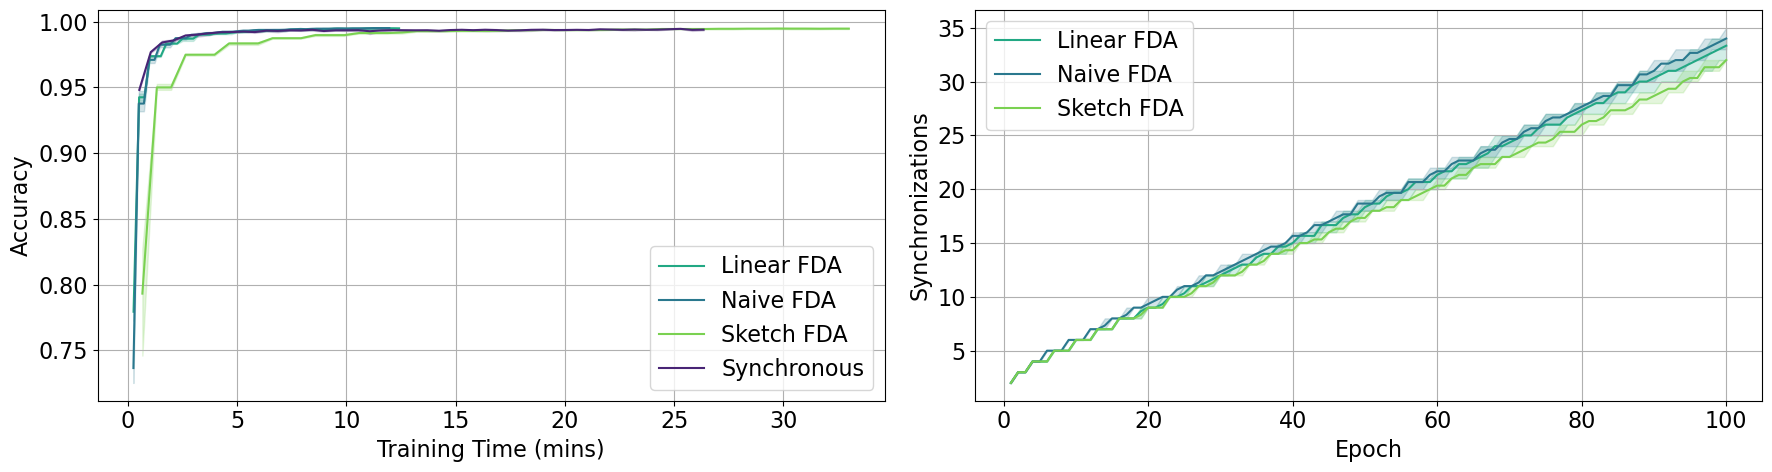

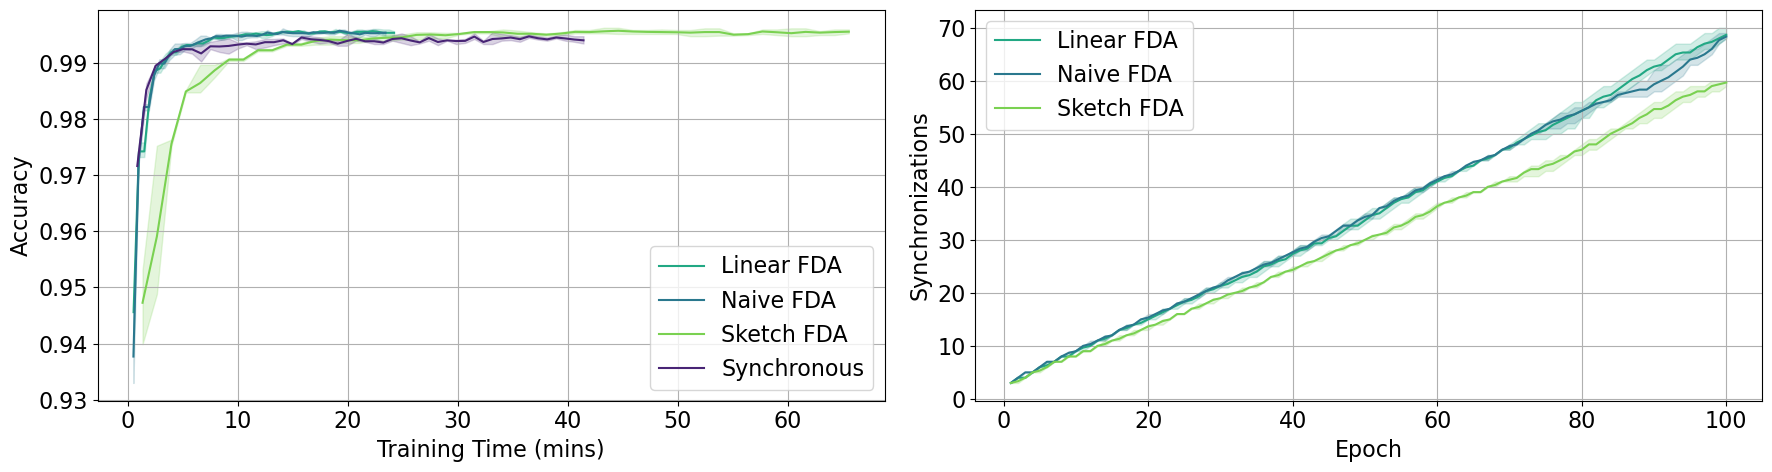

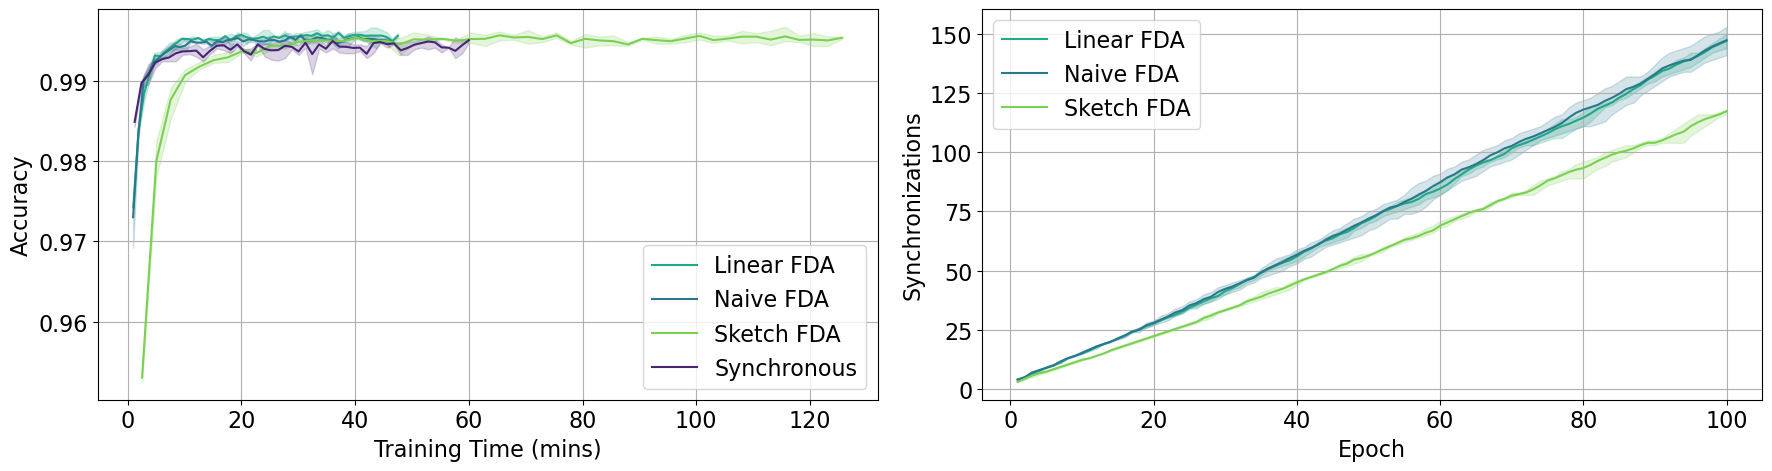

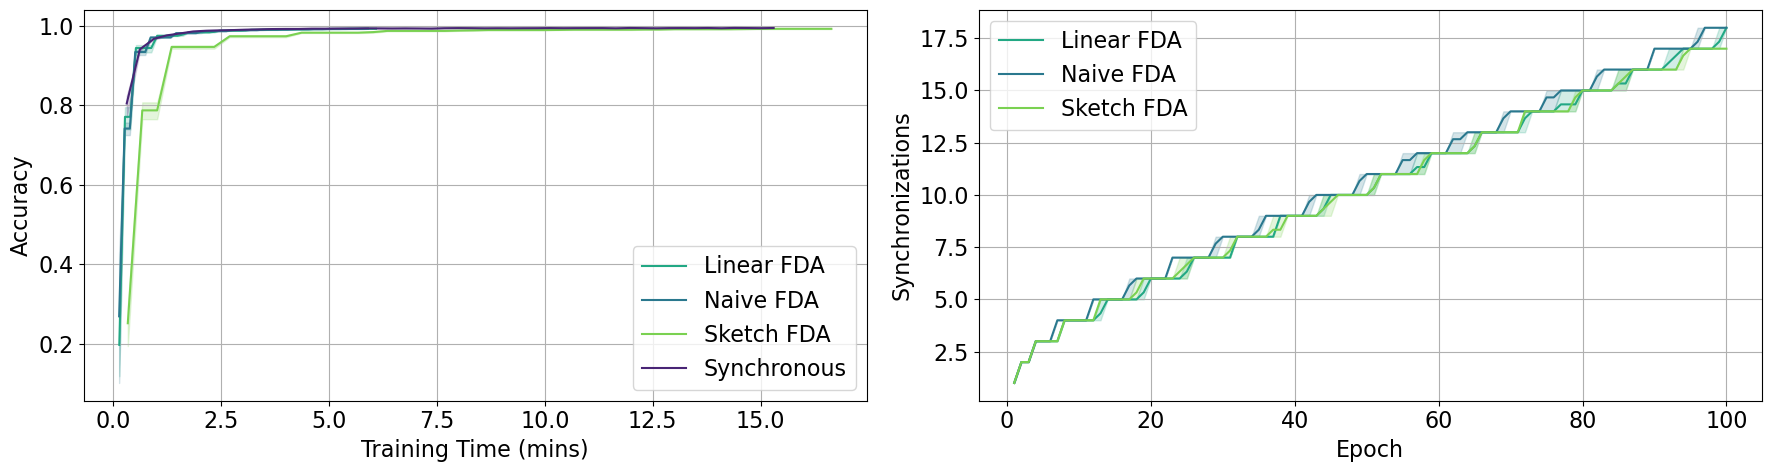

In [49]:
da = data_analysis("last_expers")
da.select_where({'batch_size': 128, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'syncs_y', True)
accuracy_df = accuracy_df[accuracy_df['epoch']<51]
distinct_clients = da.df['info']['clients'].unique()

# For each individual number of clients
for clients in distinct_clients:
    # Filter the DataFrame for rows where 'clients' column is equal to the current 'clients'
    filtered_accuracy_df = accuracy_df[accuracy_df['clients'] == clients]
    filtered_syncs_df = syncs_df[(syncs_df['clients'] == clients) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    ax1.grid()
    ax2.grid()

    plt.savefig("figures/accuracy_syncs-clients_"+str(clients)+".pdf")

### Variable: batch size

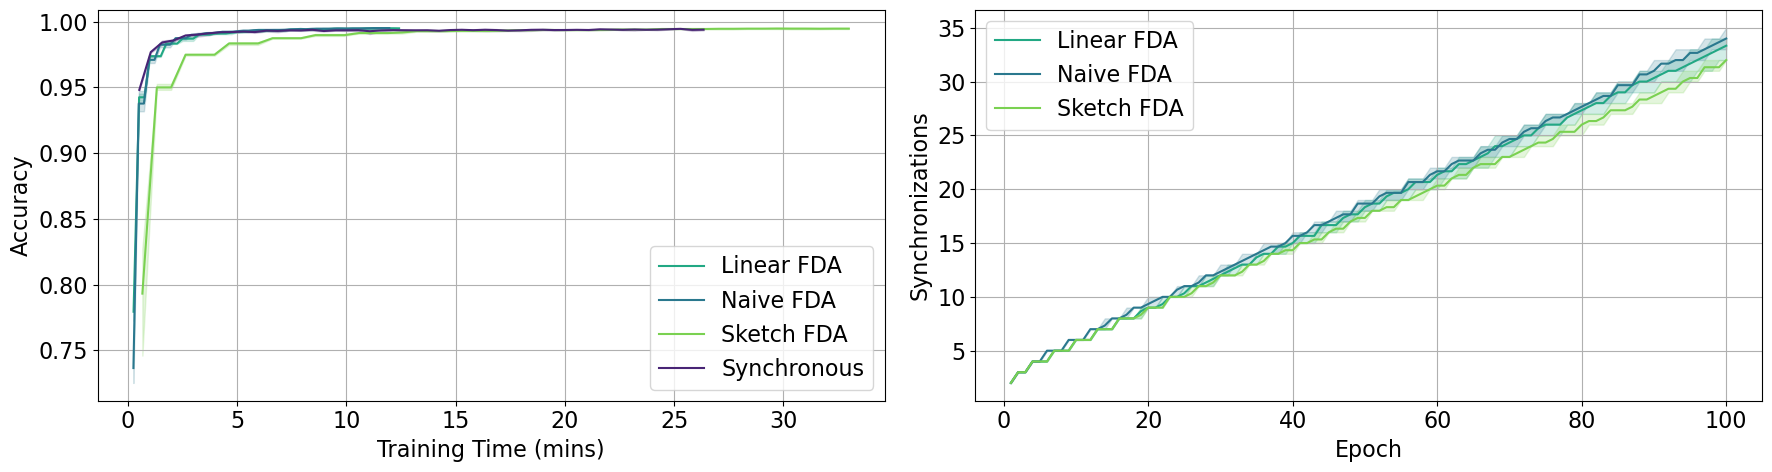

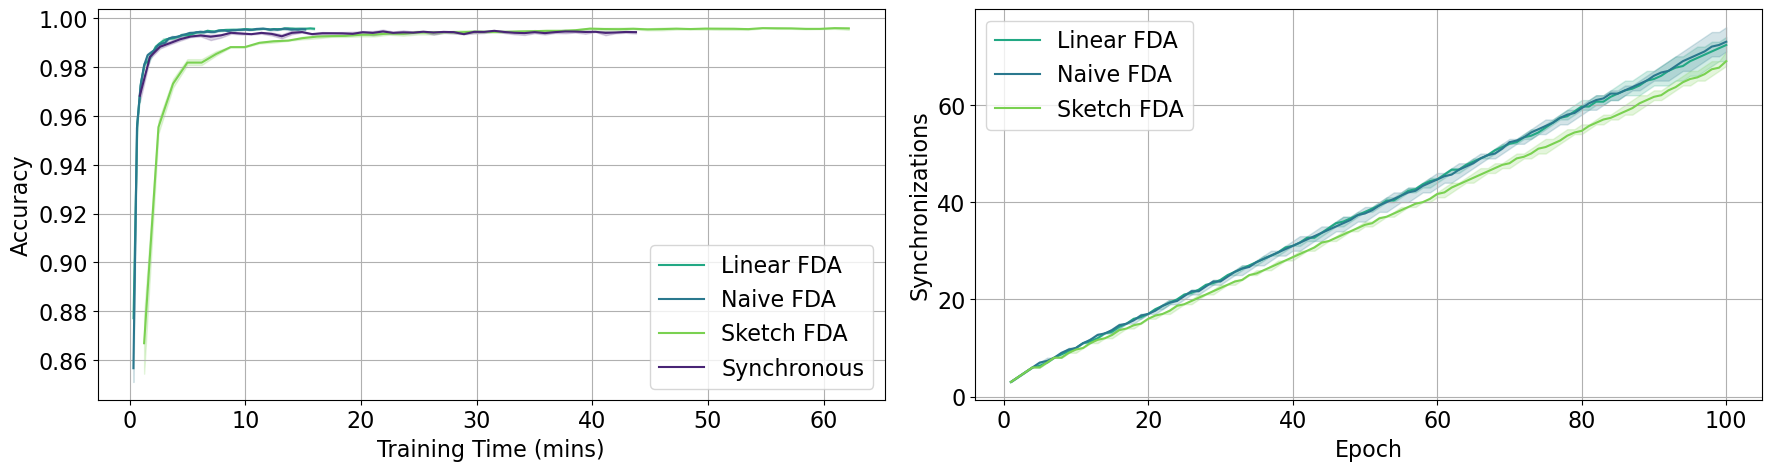

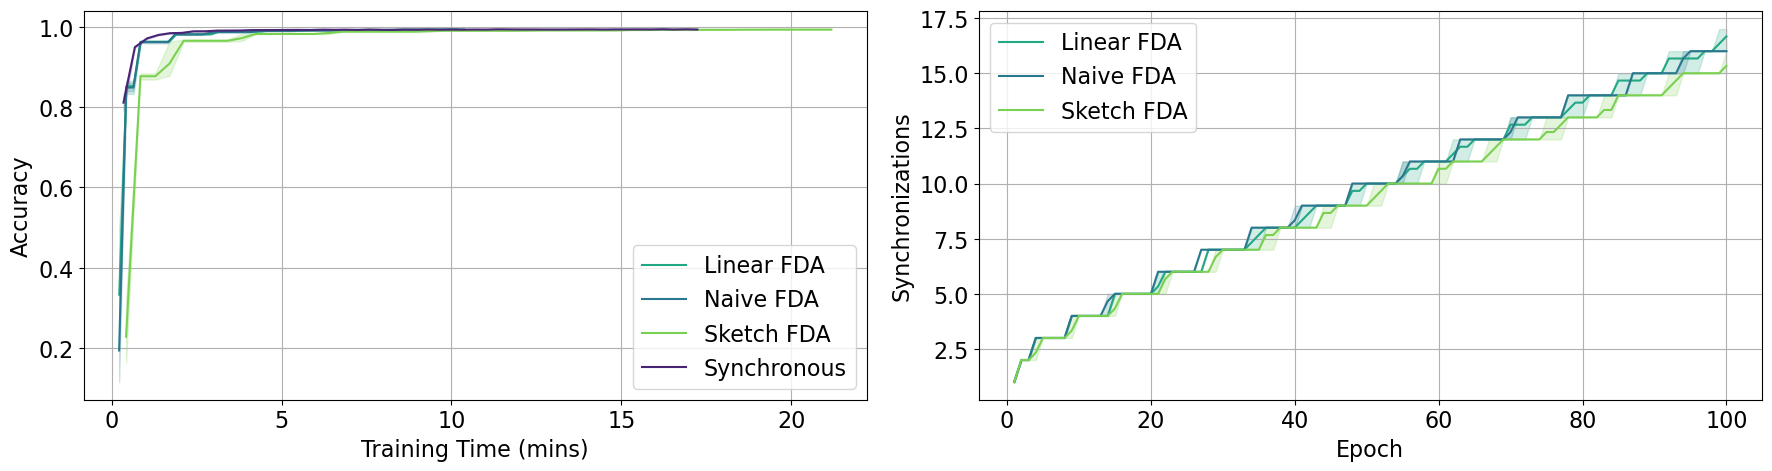

In [50]:
da = data_analysis("last_expers")
da.select_where({'clients': 16, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'syncs_y', True)
accuracy_df = accuracy_df[accuracy_df['epoch']<51]
distinct_batch_size = da.df['info']['batch_size'].unique()

# For each individual number of batch_size
for batch_size in distinct_batch_size:
    # Filter the DataFrame for rows where 'batch_size' column is equal to the current 'batch_size'
    filtered_accuracy_df = accuracy_df[accuracy_df['batch_size'] == batch_size]
    filtered_syncs_df = syncs_df[(syncs_df['batch_size'] == batch_size) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    ax1.grid()
    ax2.grid()

    plt.savefig("figures/accuracy_syncs-batch_size_"+str(batch_size)+".pdf")


### Variable: threshold

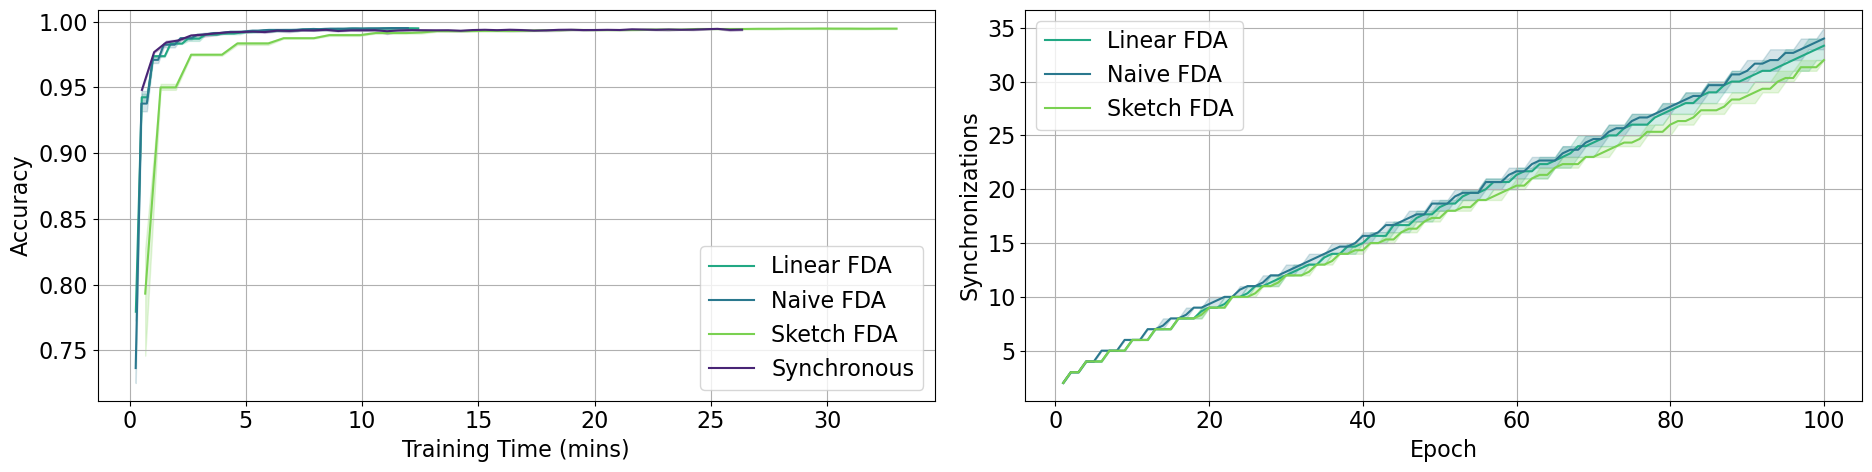

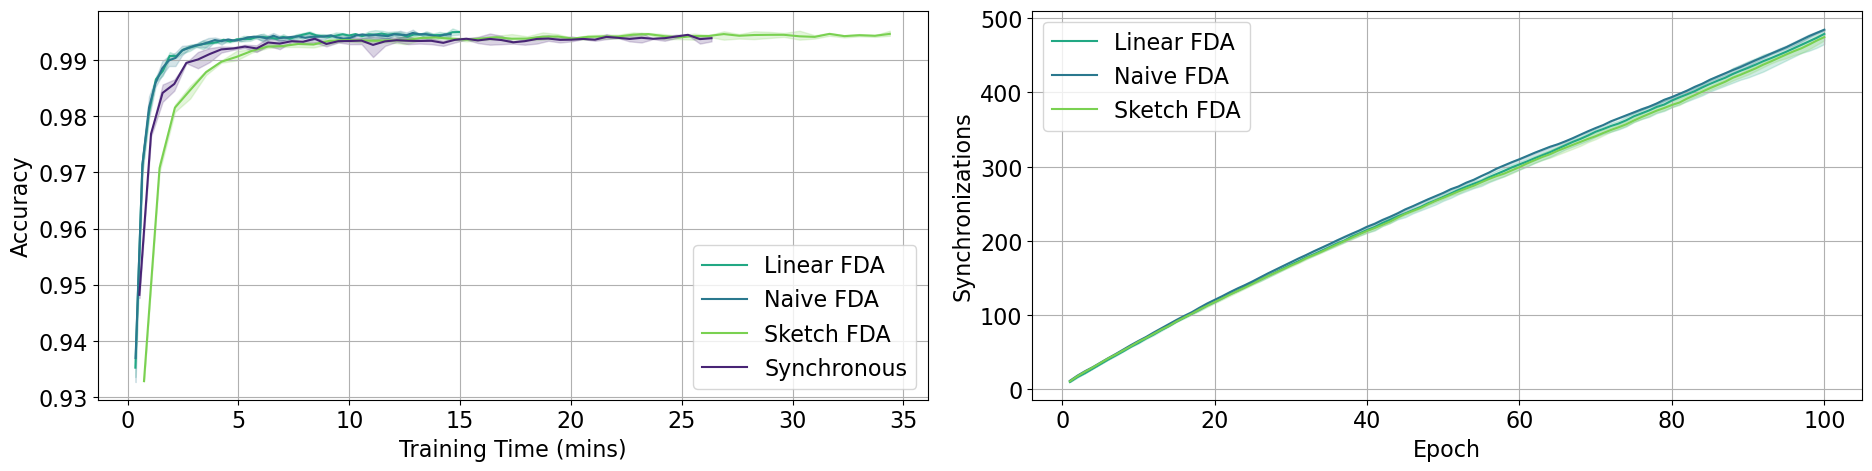

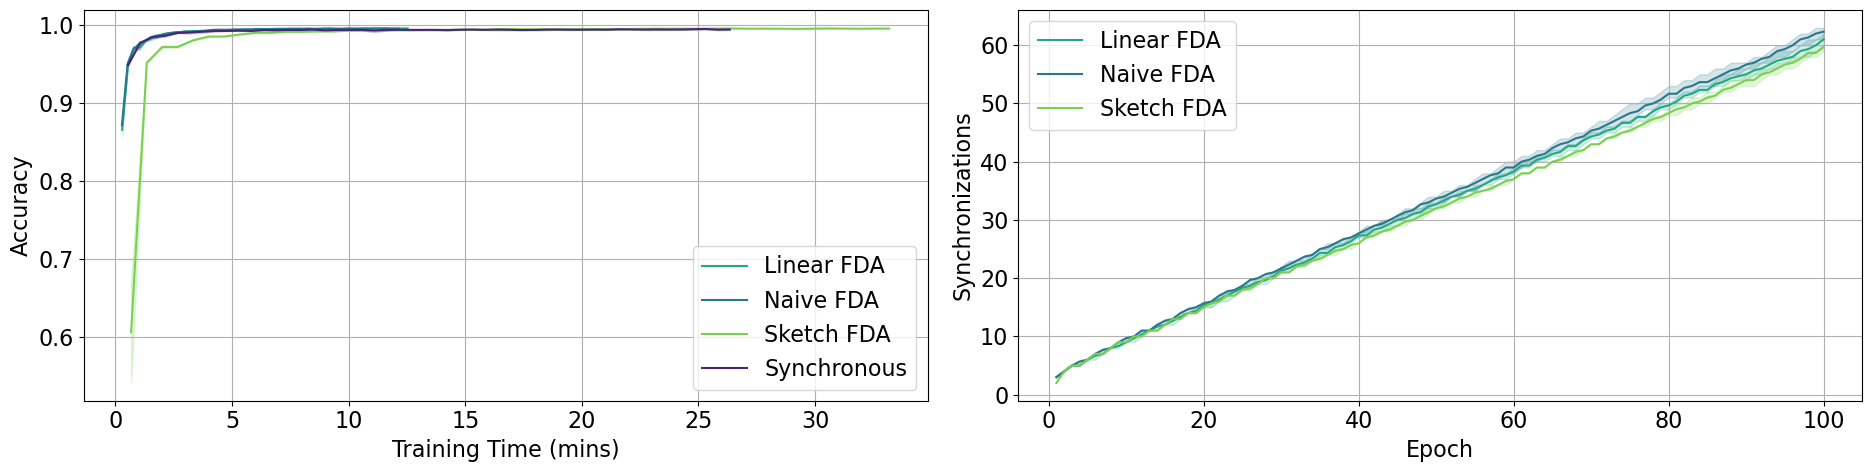

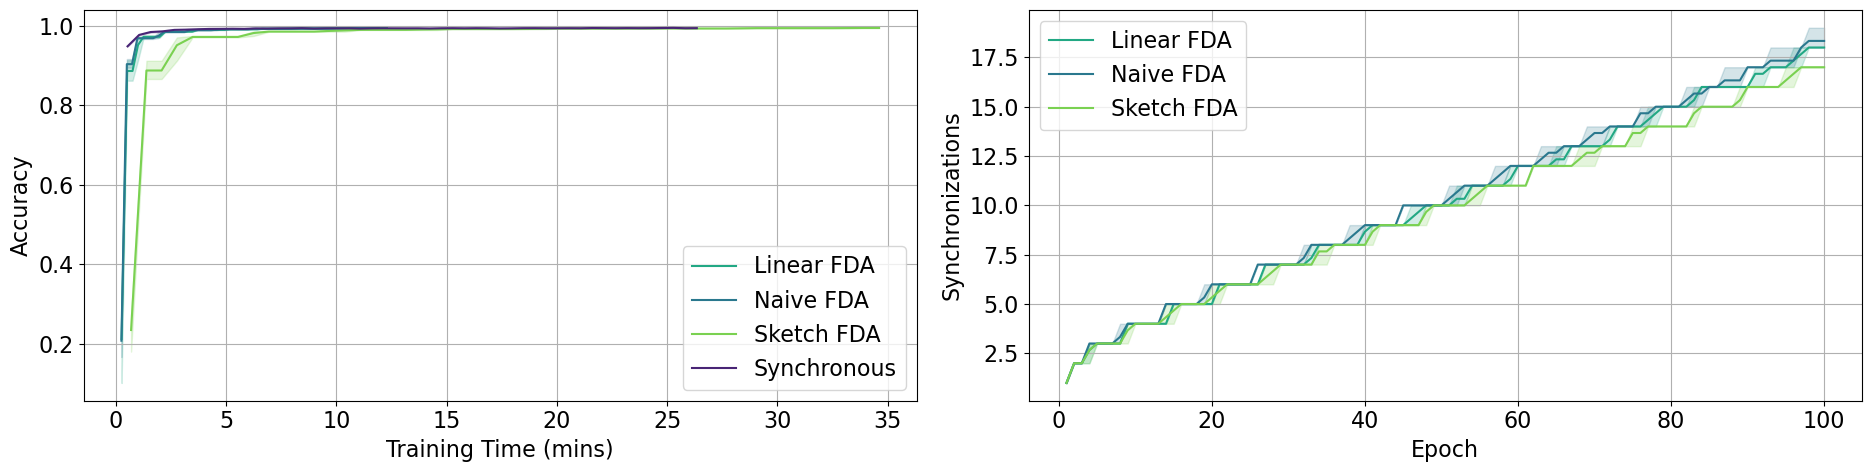

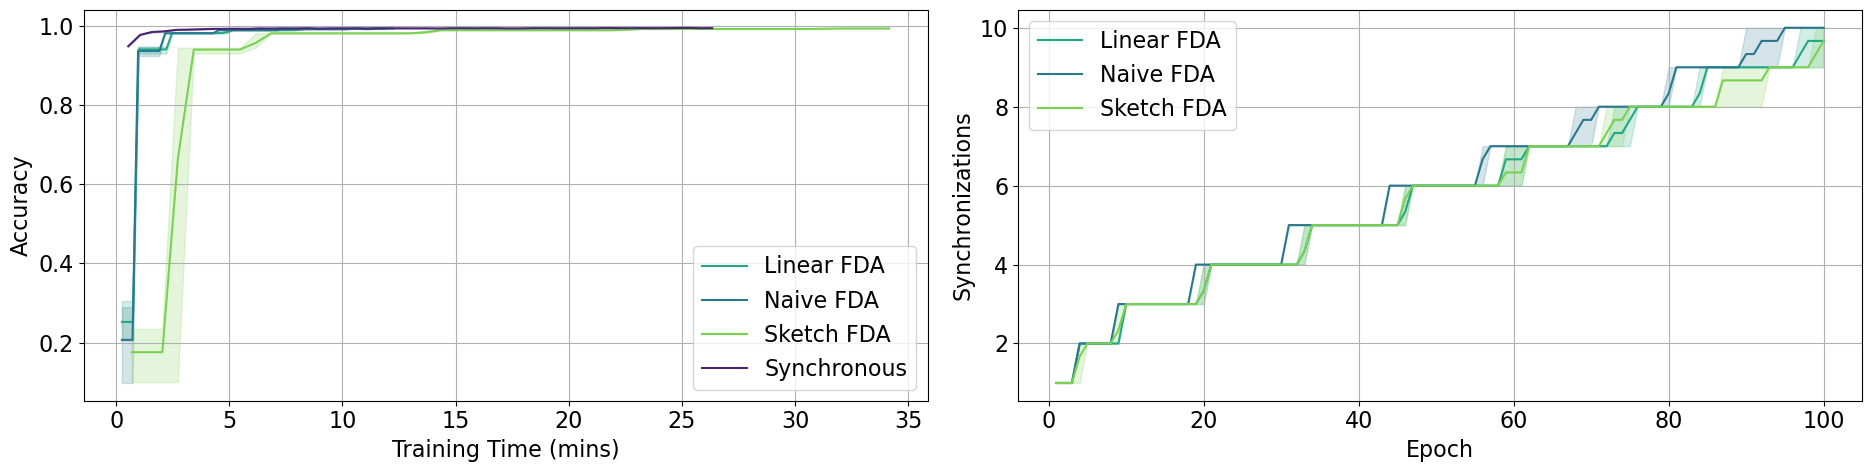

In [51]:
da = data_analysis("last_expers")
da.select_where({'clients': 16, 'batch_size': 128})
accuracy_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'syncs_y', True)
accuracy_df = accuracy_df[accuracy_df['epoch']<51]
distinct_threshold = da.df['info'].dropna()['threshold'].unique()

# For each individual number of threshold
for threshold in distinct_threshold:
    # Filter the DataFrame for rows where 'threshold' column is equal to the current 'threshold'
    filtered_accuracy_df = accuracy_df[(accuracy_df['threshold'] == threshold) | (accuracy_df['threshold'].isna())]
    filtered_syncs_df = syncs_df[(syncs_df['threshold'] == threshold) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    ax1.grid()
    ax2.grid()

    plt.savefig("figures/accuracy_syncs-threshold_"+str(threshold)+".pdf")

## Syncs over Clients / Batch Size

In [3]:
da = data_analysis("last_expers")
da.select_where({'threshold': 50})
syncs_df = da.group_repeated_expers(['threshold', 'epoch', 'batch_size', 'clients'], 'epoch', 'syncs_y', True)
syncs_df = syncs_df[ (syncs_df['epoch']==100) & (syncs_df['threshold'].notna())]
syncs_df = syncs_df[['clients', 'batch_size', 'syncs_y_mean']]
numpy_array = syncs_df.values
plt.rcParams.update({'font.size': 10})

## trisurf

In [ ]:

# Extracting columns from the numpy array
clients = numpy_array[:, 0]
batch_size = numpy_array[:, 1]
syncs_y_mean = numpy_array[:, 2]

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating a triangulation
triang = Triangulation(clients, batch_size)

# Plotting the wireframe
wireframe = ax.plot_trisurf(triang, syncs_y_mean, cmap='viridis', linewidth=1, edgecolor='black', antialiased=True)

# Adding labels
ax.set_xlabel('Clients')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Mean Synchronizations')

# Adding a colorbar
fig.colorbar(wireframe, ax=ax, shrink=0.5, aspect=10)

# Set a specific view (elevation, azimuthal angle)
ax.view_init(elev=20, azim=0)

# Show the plot
plt.tight_layout()
plt.grid()
plt.show()

## scatter

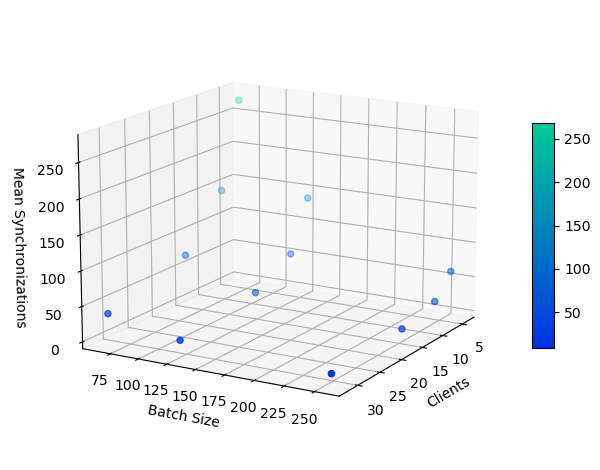

In [4]:
# Extracting columns from the numpy array
clients = numpy_array[:, 0]
batch_size = numpy_array[:, 1]
syncs_y_mean = numpy_array[:, 2]

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

new_cmap = truncate_colormap(plt.cm.winter, 0.2, 0.8)

# Scatter plot
scatter = ax.scatter(clients, batch_size, syncs_y_mean, c=syncs_y_mean, cmap=new_cmap)

# Adding labels
ax.set_xlabel('Clients')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Mean Synchronizations')

# Adding a colorbar
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)

# Set a specific view (elevation, azimuthal angle)
ax.view_init(elev=15, azim=30)

# Show the plot
plt.grid()
plt.tight_layout()
plt.savefig("figures/mean_syncs.pdf")

## Time until 99.5 Accuracy

12


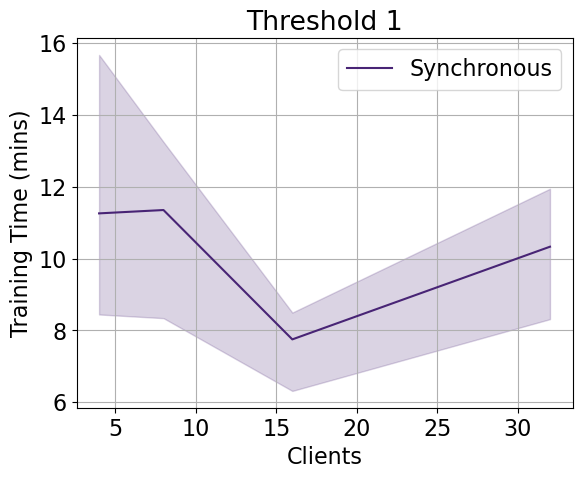

12


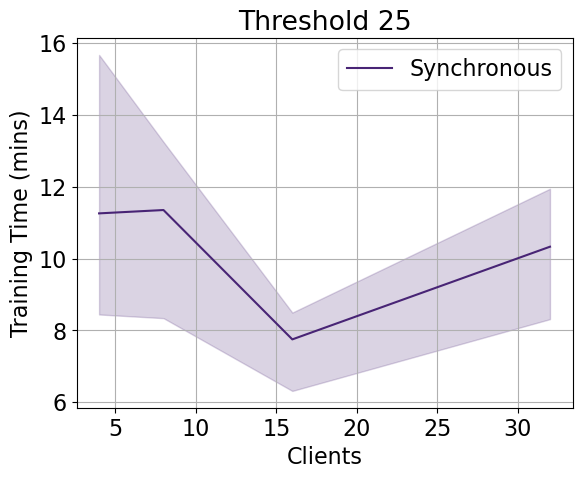

12


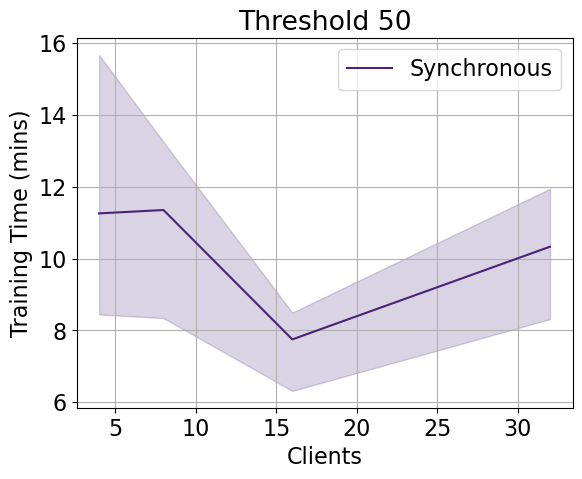

12


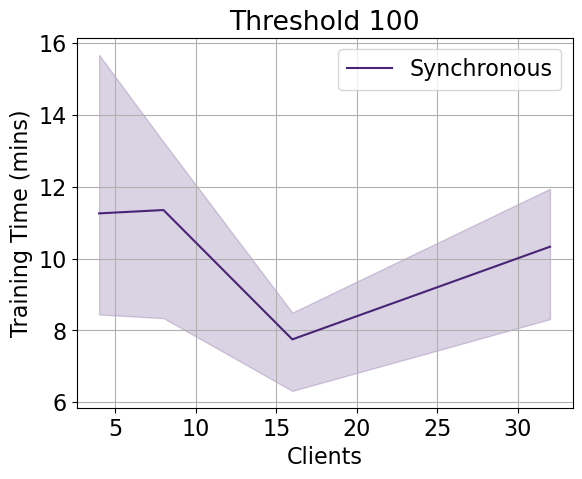

In [5]:
for threshold in (1, 25, 50, 100):
    da = data_analysis("last_expers")
    da.select_where({'threshold': threshold, 'batch_size': 128, 'algorithm': 'synchronous'})
    accuracy_df = da.df['epoch']
    result_df = accuracy_df.groupby('exper_id').apply(lambda group: group[group['accuracy'] > 0.994].iloc[0])
    result_df = result_df[['clients', 'algorithm', 'time']]
    print(result_df.shape[0])

    # Group by 'clients' and 'algorithm', and calculate mean, min, and max for 'time'
    agg_df = result_df.groupby(['clients', 'algorithm'])['time'].agg(['mean', 'min', 'max']).reset_index()

    # Rename the columns for clarity
    agg_df.columns = ['clients', 'algorithm', 'mean_time', 'min_time', 'max_time']

    plt.figure()

    # Plot for filtered_accuracy_df
    for key, group in agg_df.groupby('algorithm'):
        plt.plot(group['clients'], group['mean_time'] / 60, label=algo_labels[key], color=algo_colors[key])
        plt.fill_between(group['clients'], group['min_time']/60, group['max_time']/60, alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    plt.title(f"Threshold {threshold}")
    plt.xlabel("Clients")
    plt.ylabel("Training Time (mins)")
    plt.legend()

    # Show the plot
    plt.grid()
    plt.show()



## Batch Size for clients: 4, 8, 32

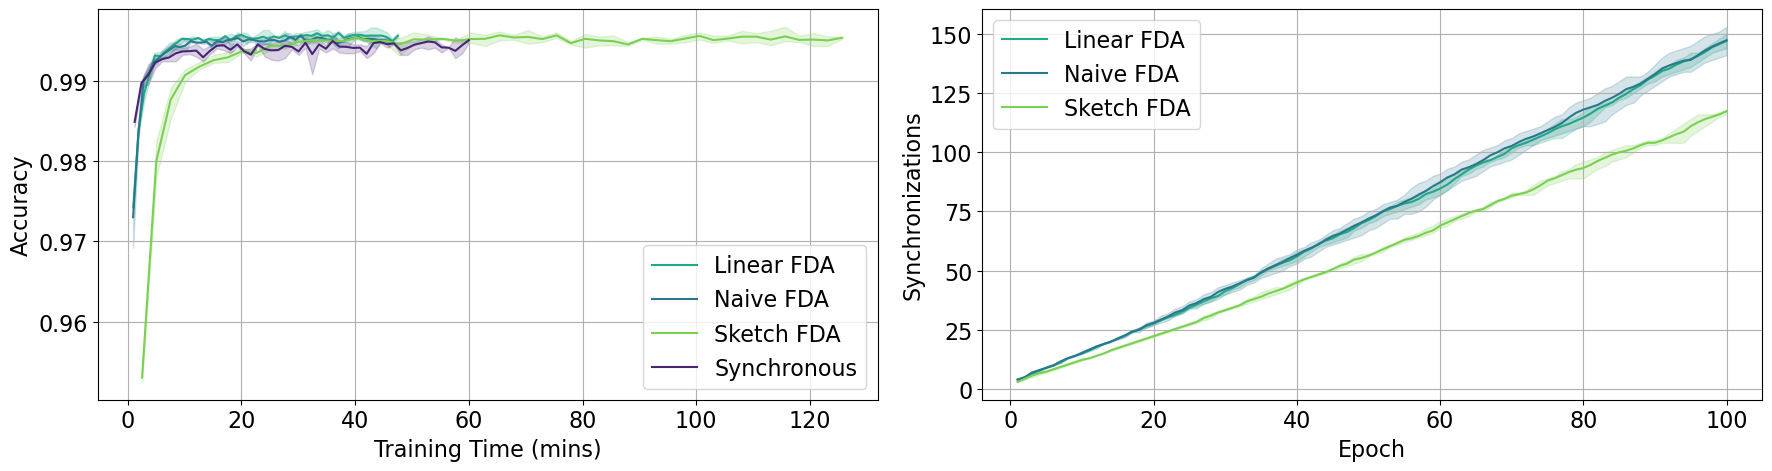

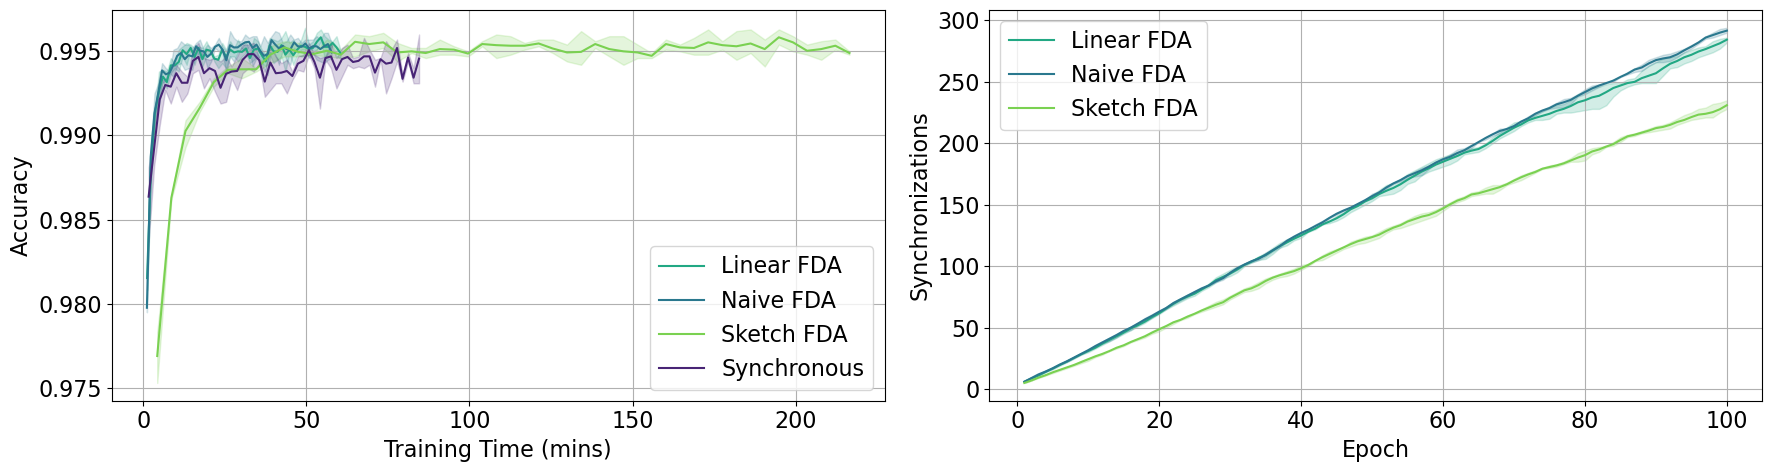

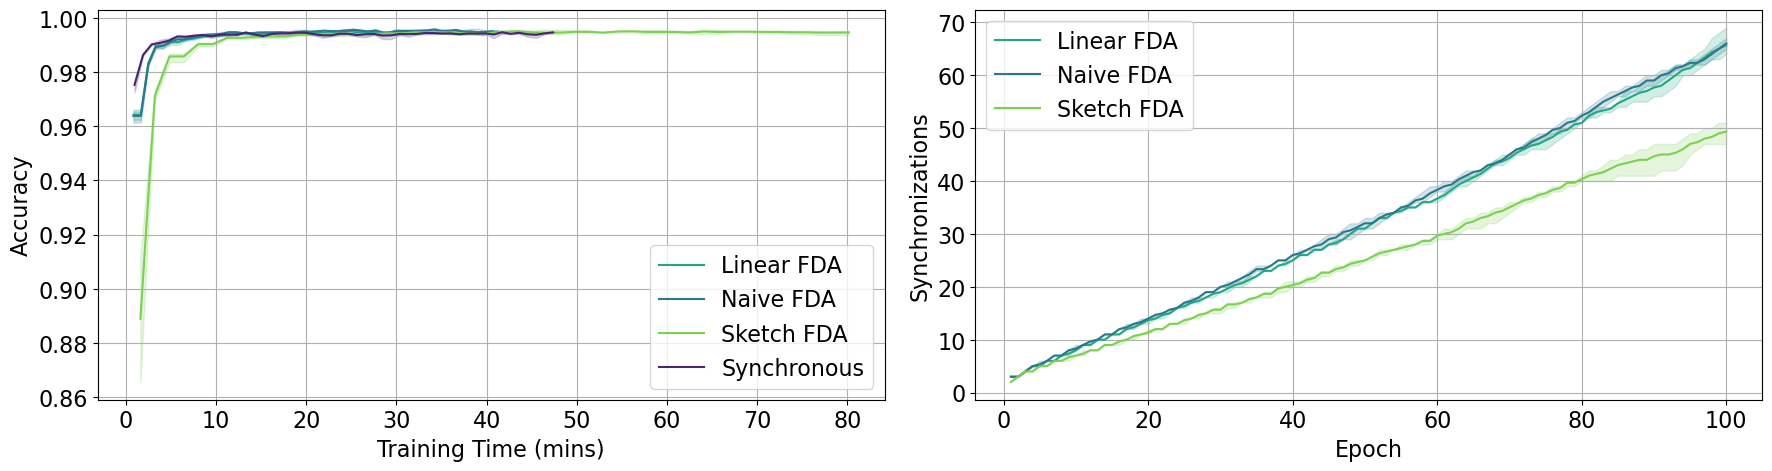

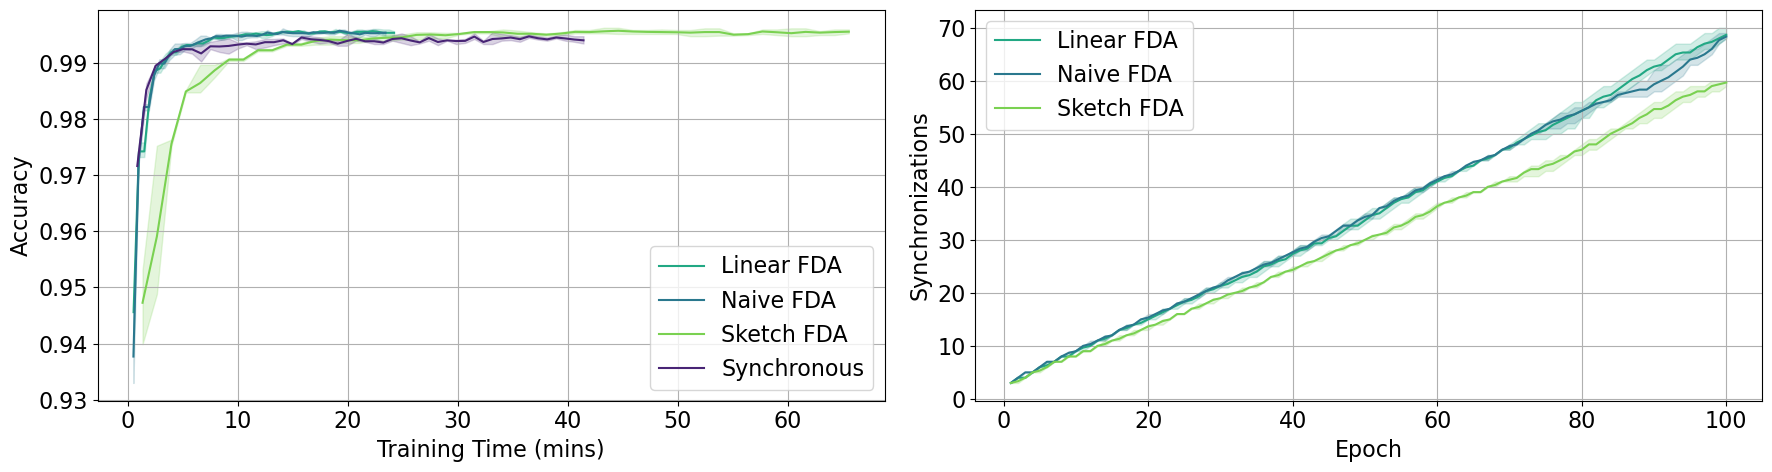

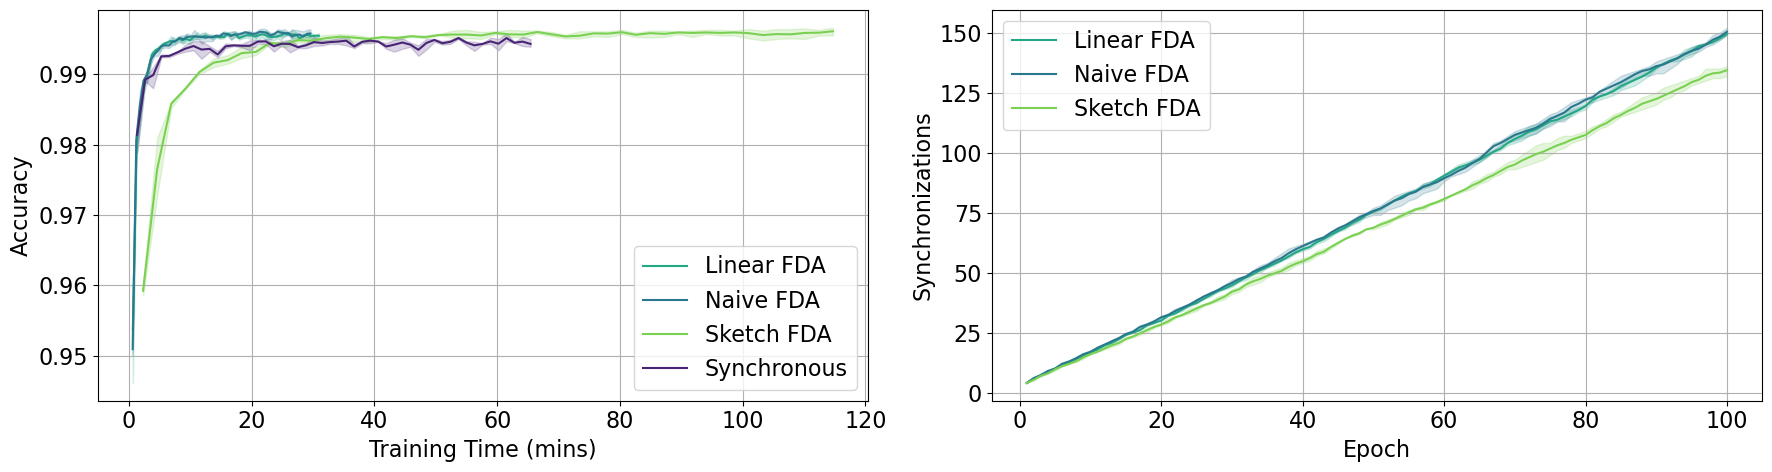

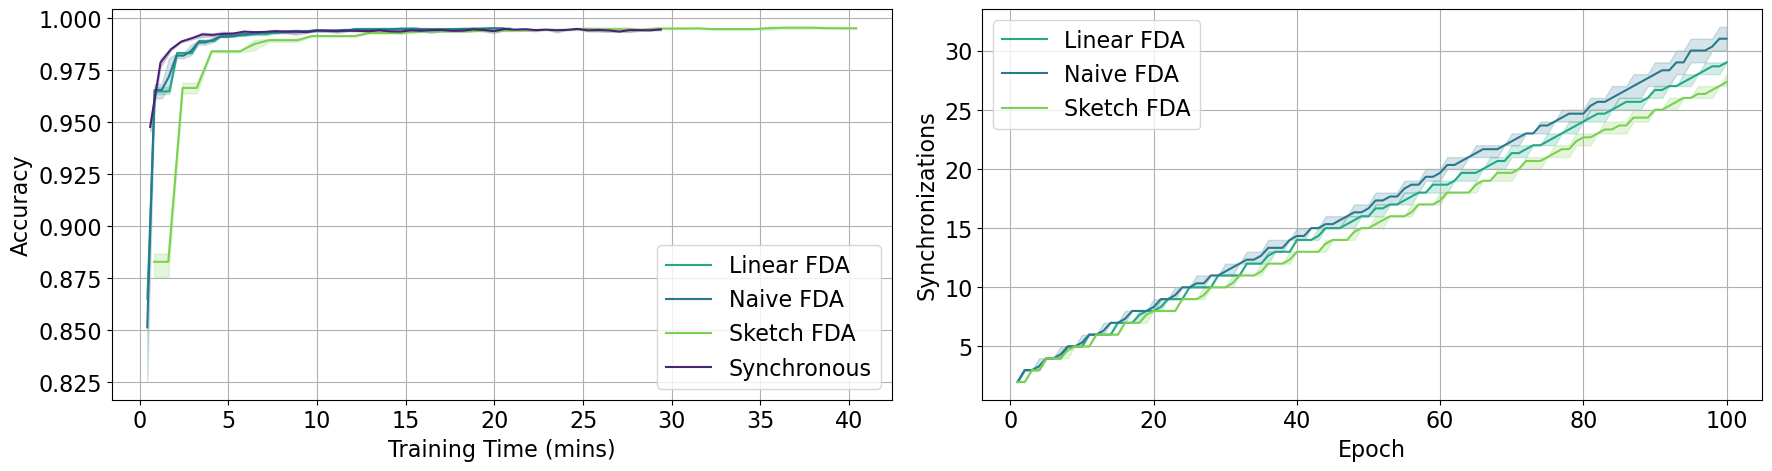

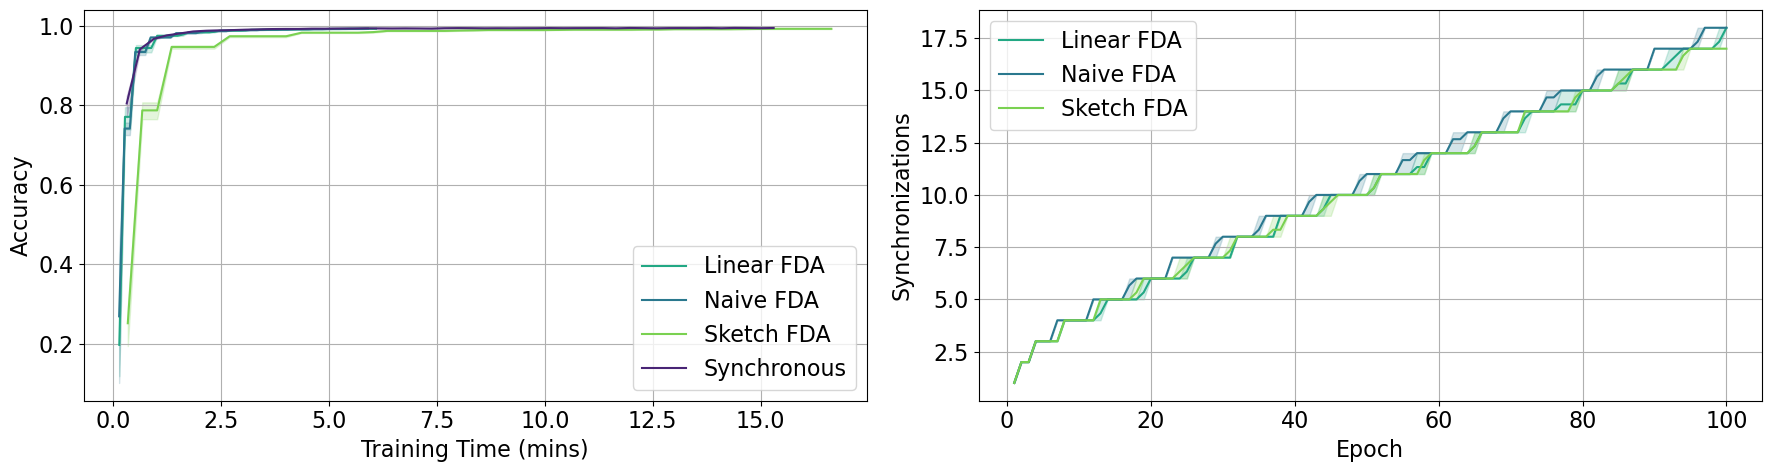

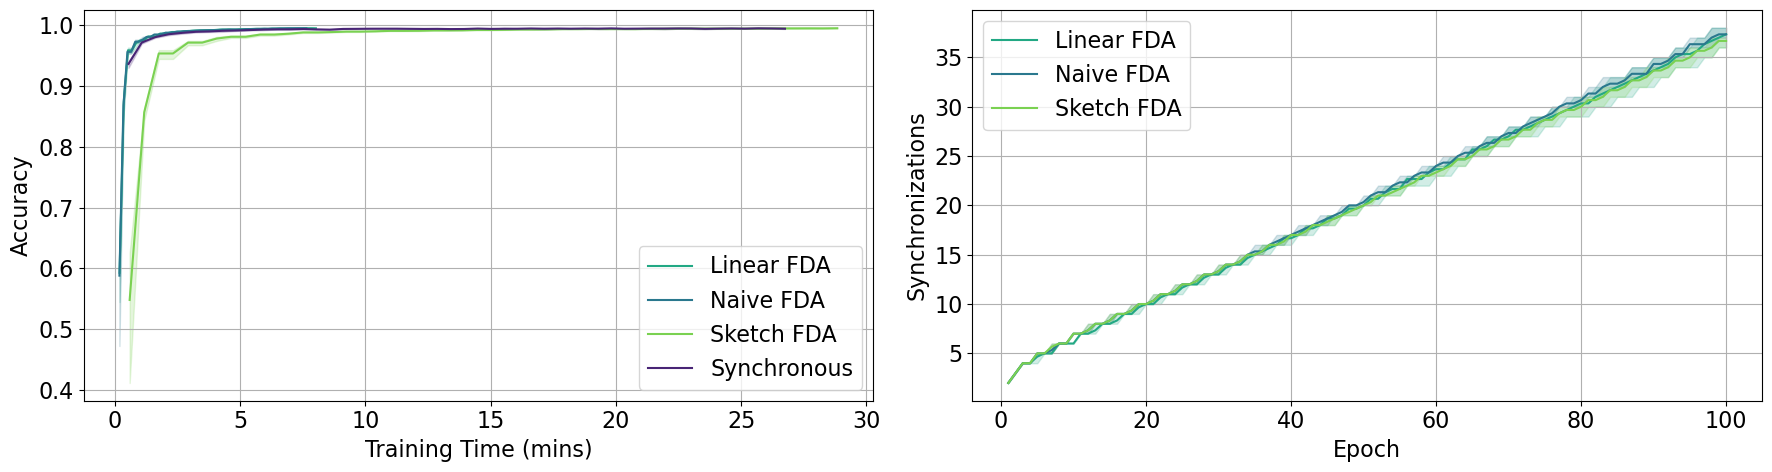

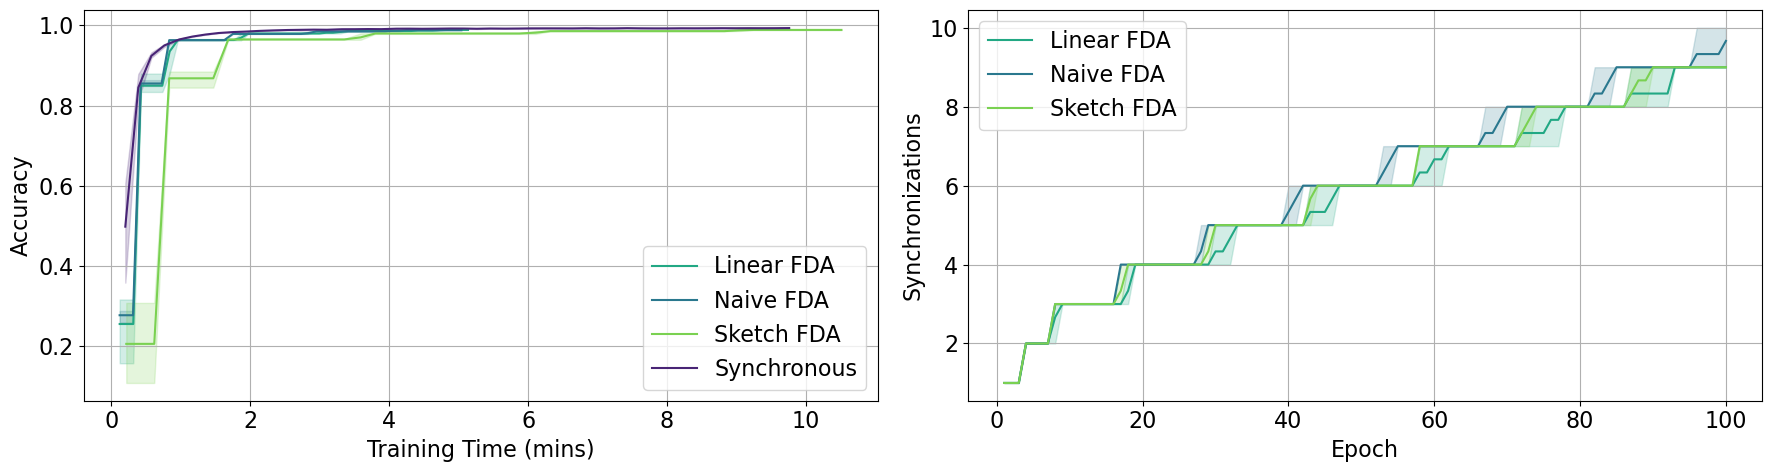

In [52]:
plt.rcParams.update({'font.size': 16})
for clients in (4, 8, 32):
    da = data_analysis("last_expers")
    da.select_where({'clients': clients, 'threshold': 50})
    accuracy_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
    syncs_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'syncs_y', True)
    accuracy_df = accuracy_df[accuracy_df['epoch']<51]
    distinct_batch_size = da.df['info']['batch_size'].unique()

    # For each individual number of batch_size
    for batch_size in distinct_batch_size:
        # Filter the DataFrame for rows where 'batch_size' column is equal to the current 'batch_size'
        filtered_accuracy_df = accuracy_df[accuracy_df['batch_size'] == batch_size]
        filtered_syncs_df = syncs_df[(syncs_df['batch_size'] == batch_size) & (syncs_df['algorithm'] != 'synchronous')]

        # Create a new figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

        # Plot for filtered_accuracy_df
        for key, group in filtered_accuracy_df.groupby('algorithm'):
            ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
            ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

        # Add title, labels, and legend for the first subplot
        ax1.set_xlabel("Training Time (mins)")
        ax1.set_ylabel("Accuracy")
        ax1.legend()

        # Plot for filtered_syncs_df
        for key, group in filtered_syncs_df.groupby('algorithm'):
            ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], color=algo_colors[key])
            ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])

        # Add title, labels, and legend for the second subplot
        ax2.set_xlabel("Epoch")
        ax2.set_ylabel("Synchronizations")
        ax2.legend()

        # Adjust layout to prevent overlap
        plt.tight_layout()

        # Show the plot
        ax1.grid()
        ax2.grid()

        plt.savefig("figures/accuracy_syncs-batch_size_"+str(batch_size)+"_clients_"+str(clients)+".pdf")


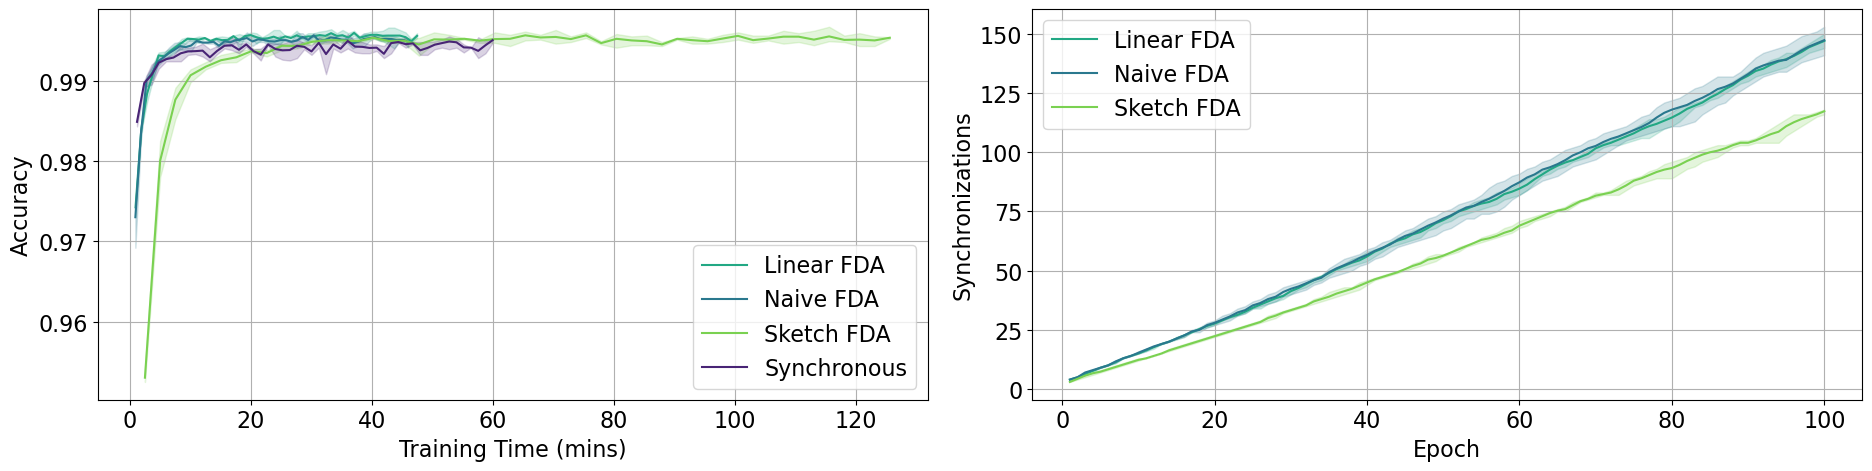

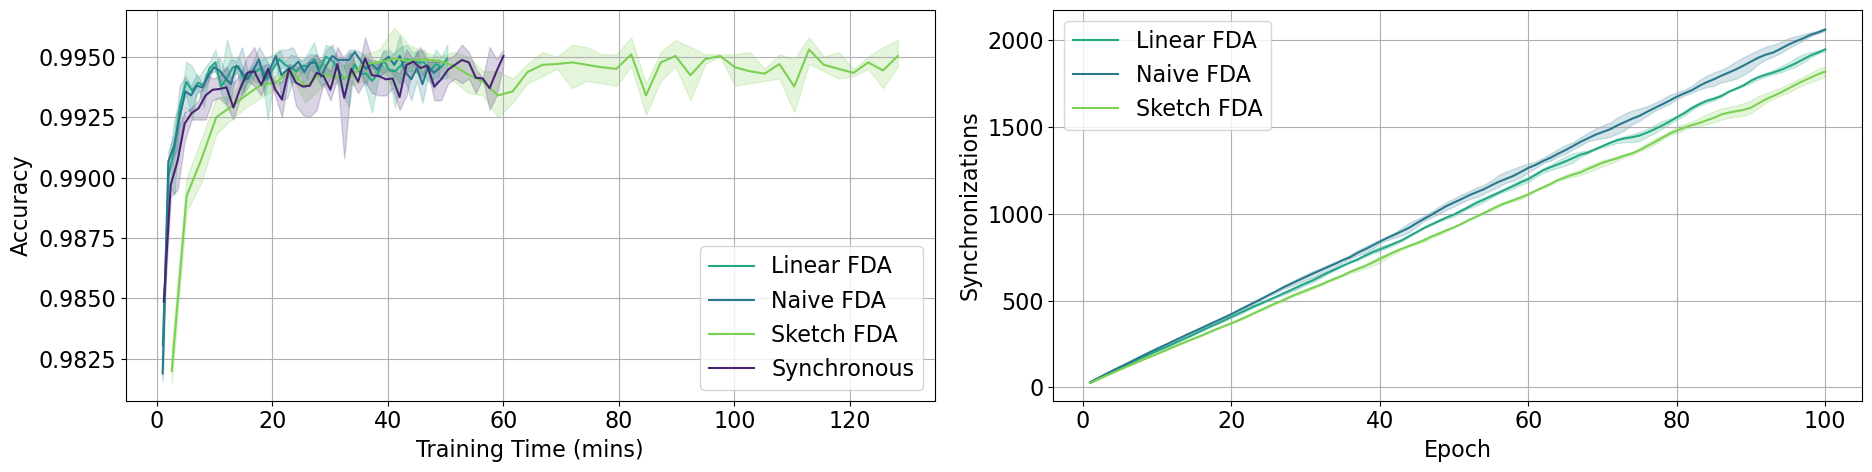

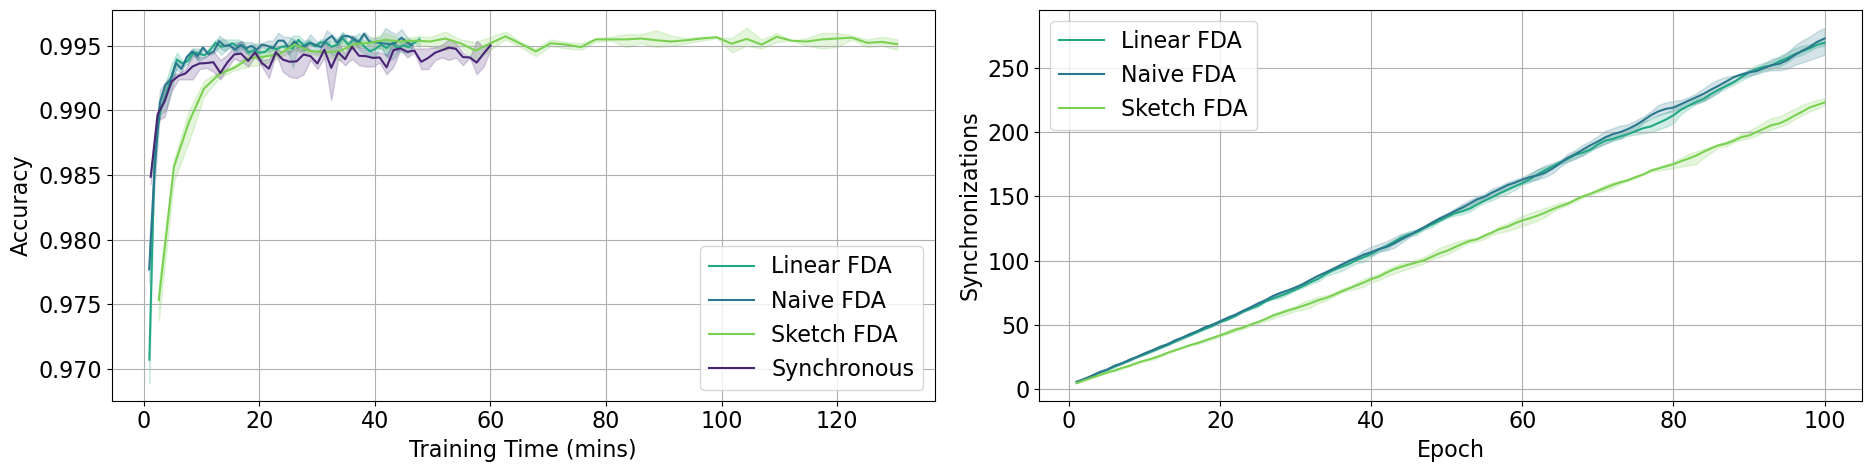

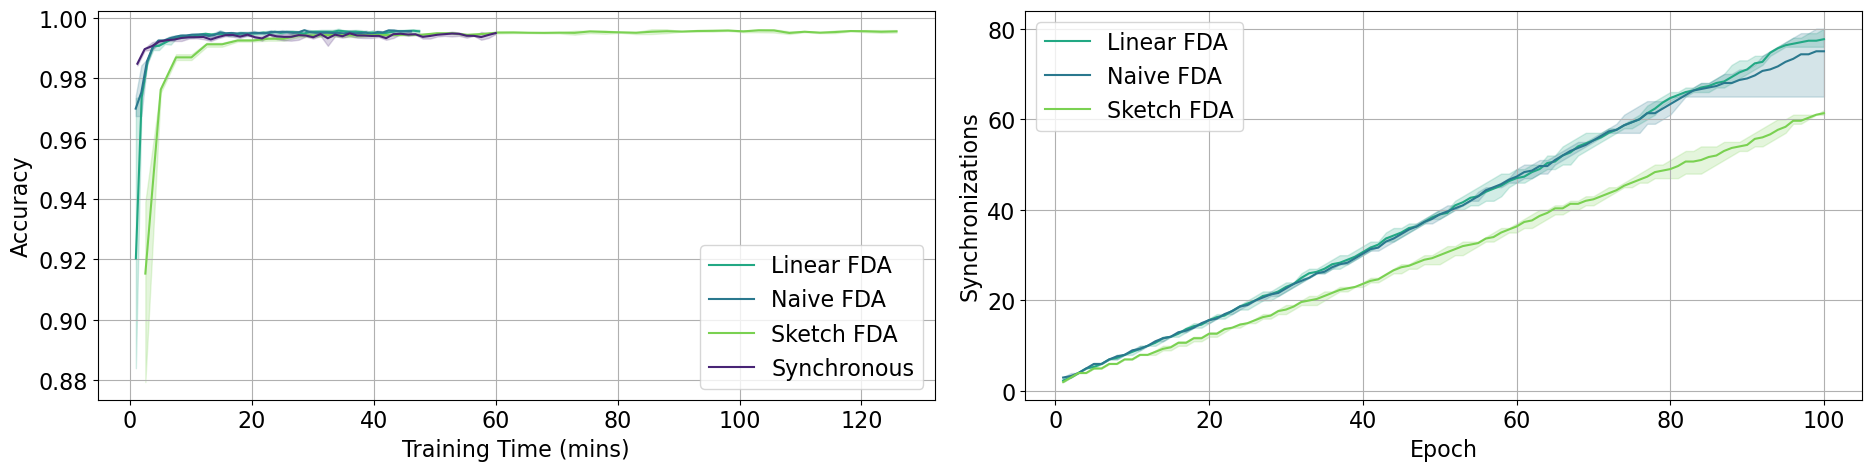

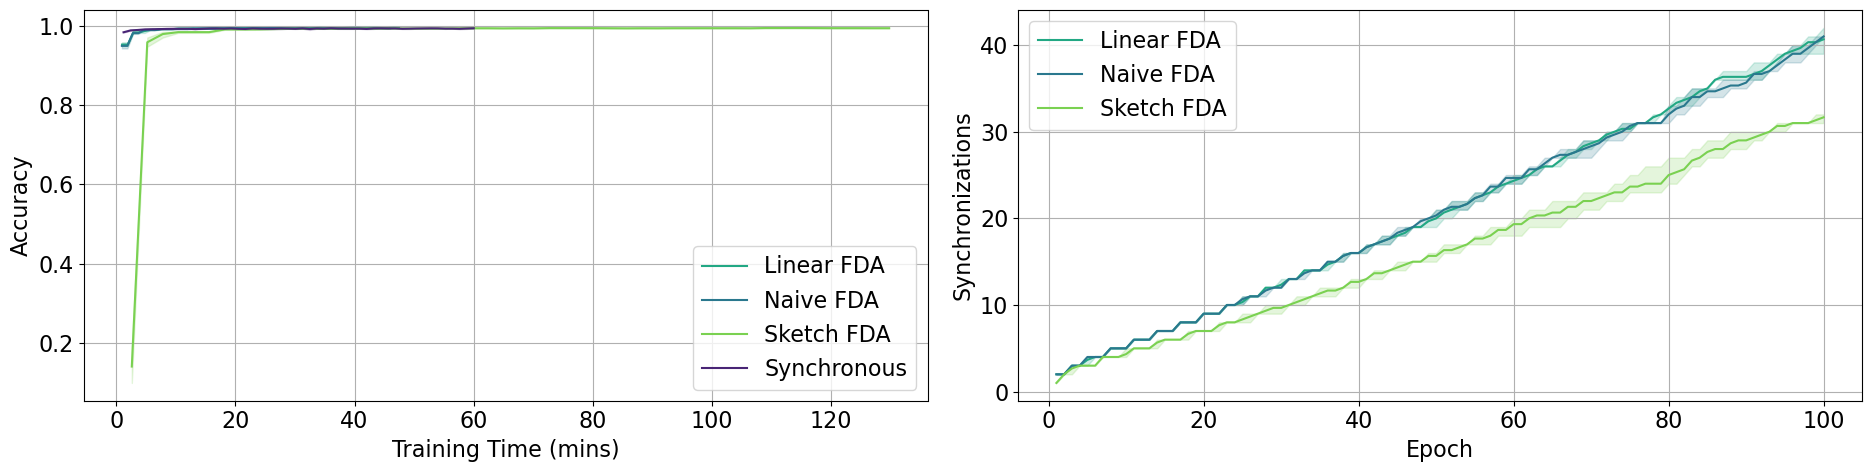

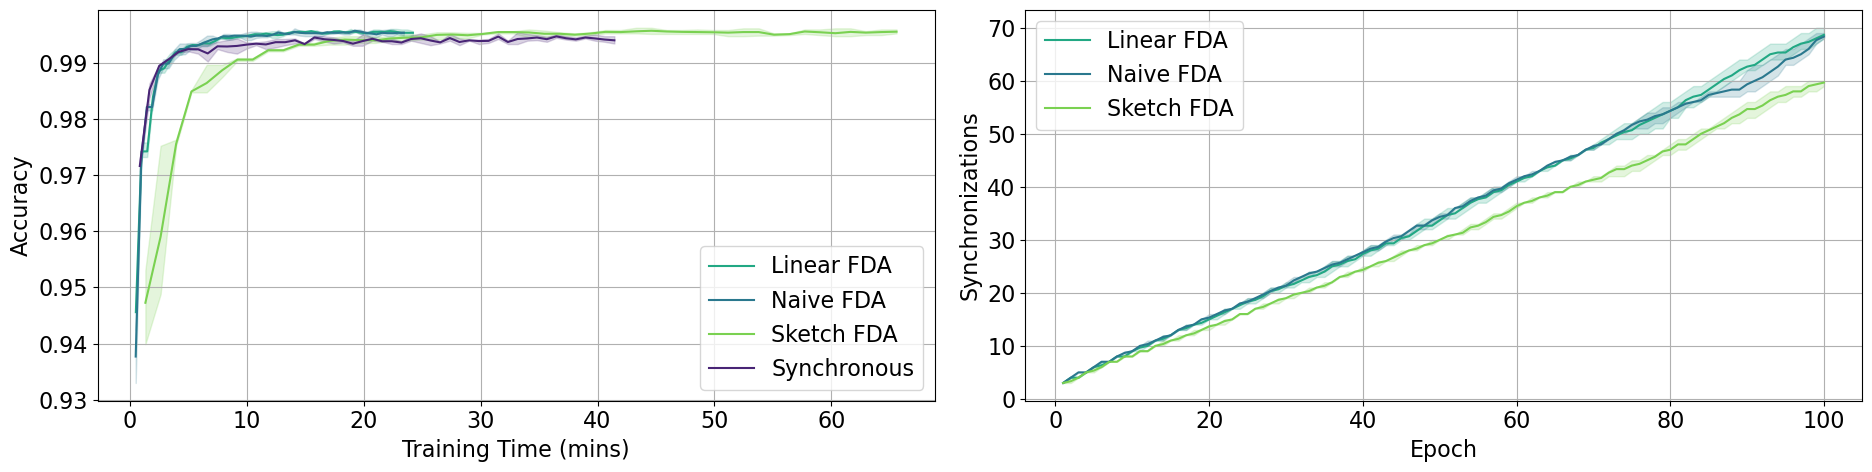

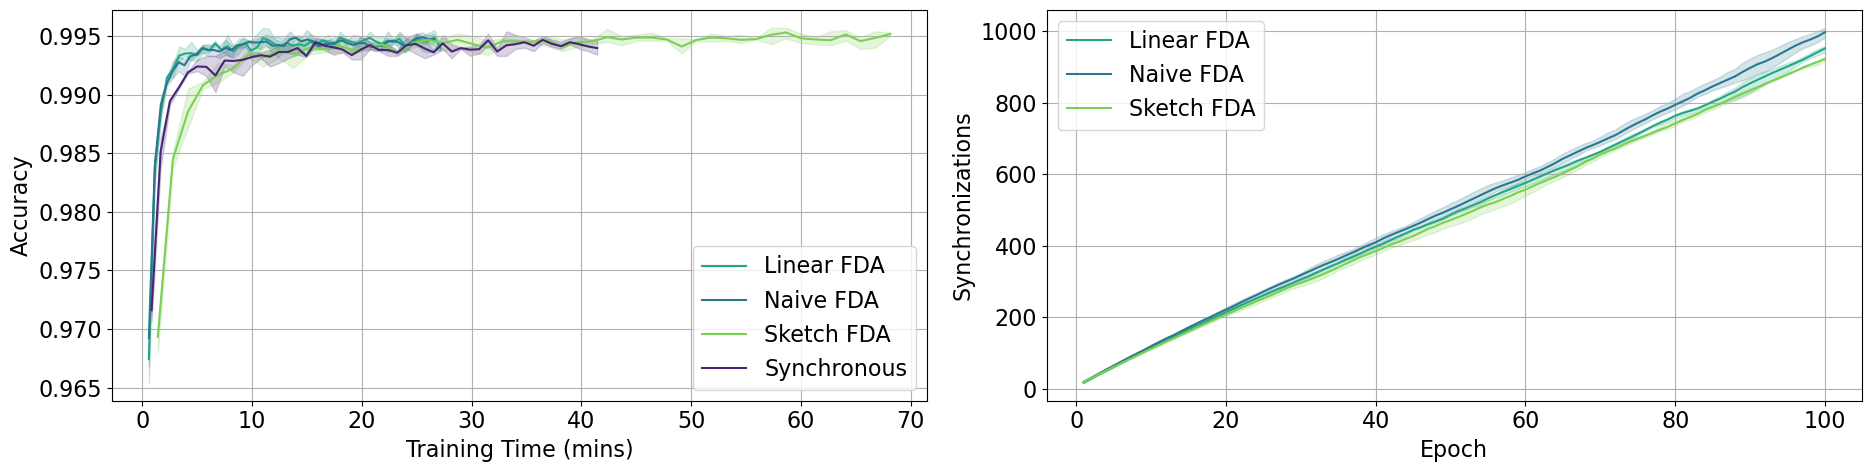

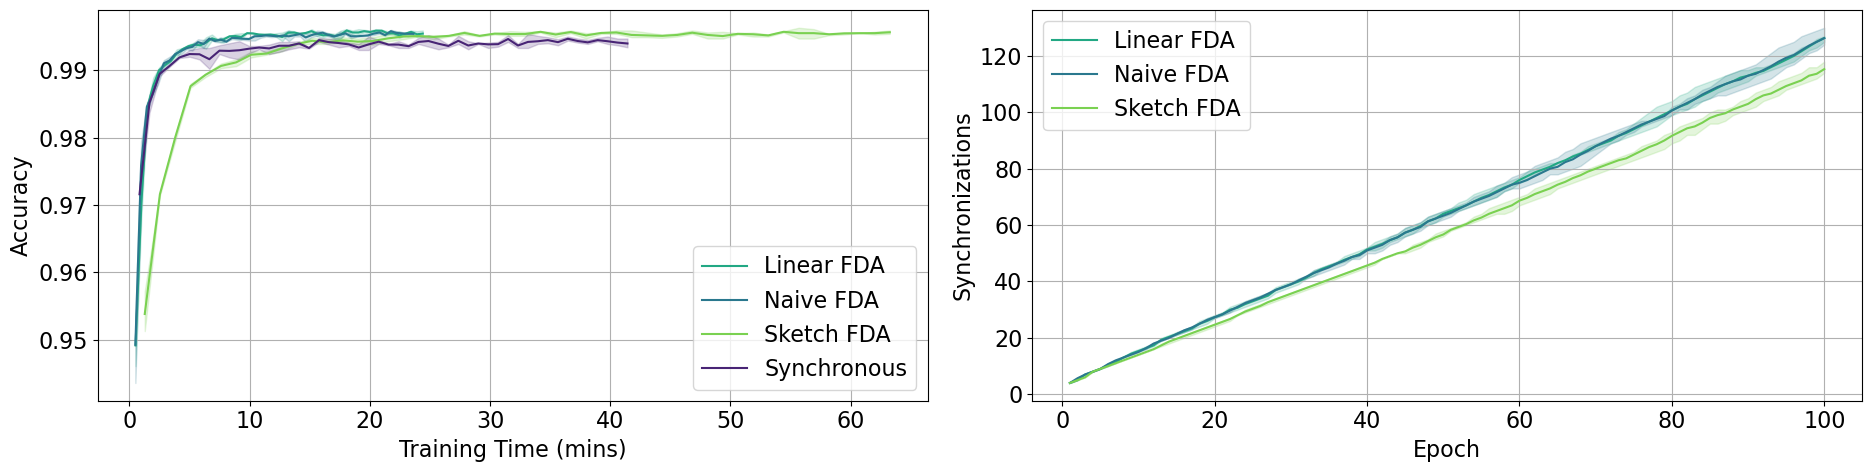

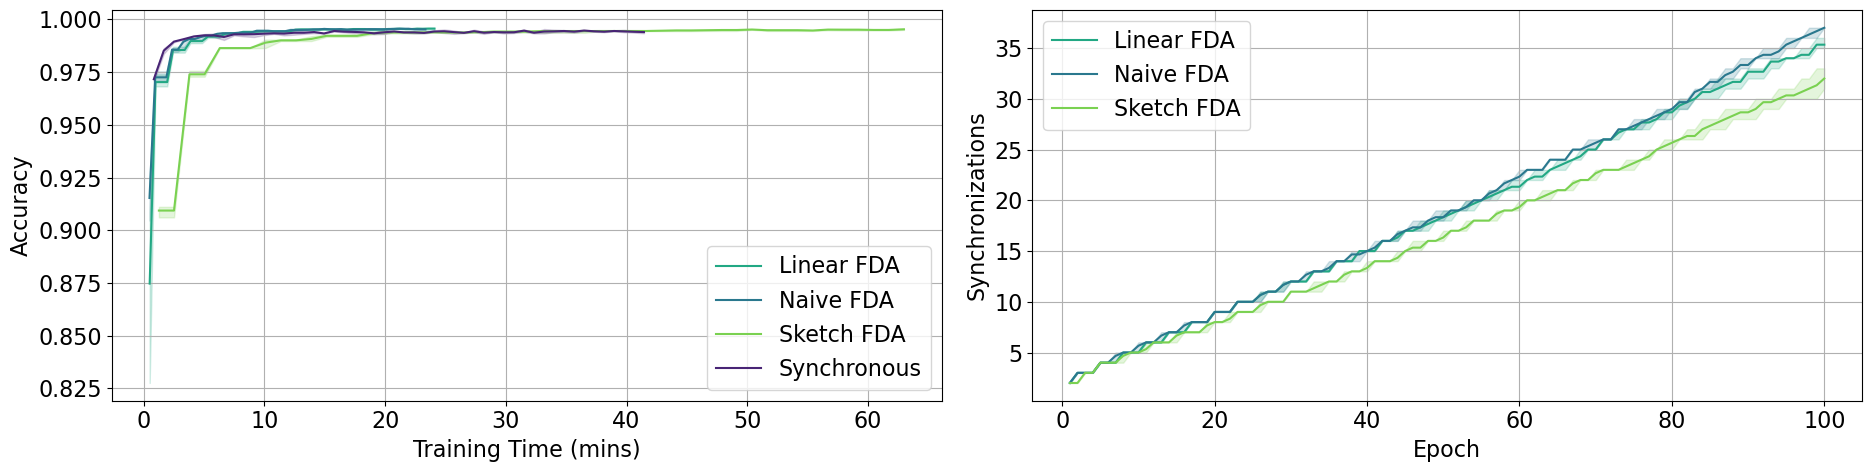

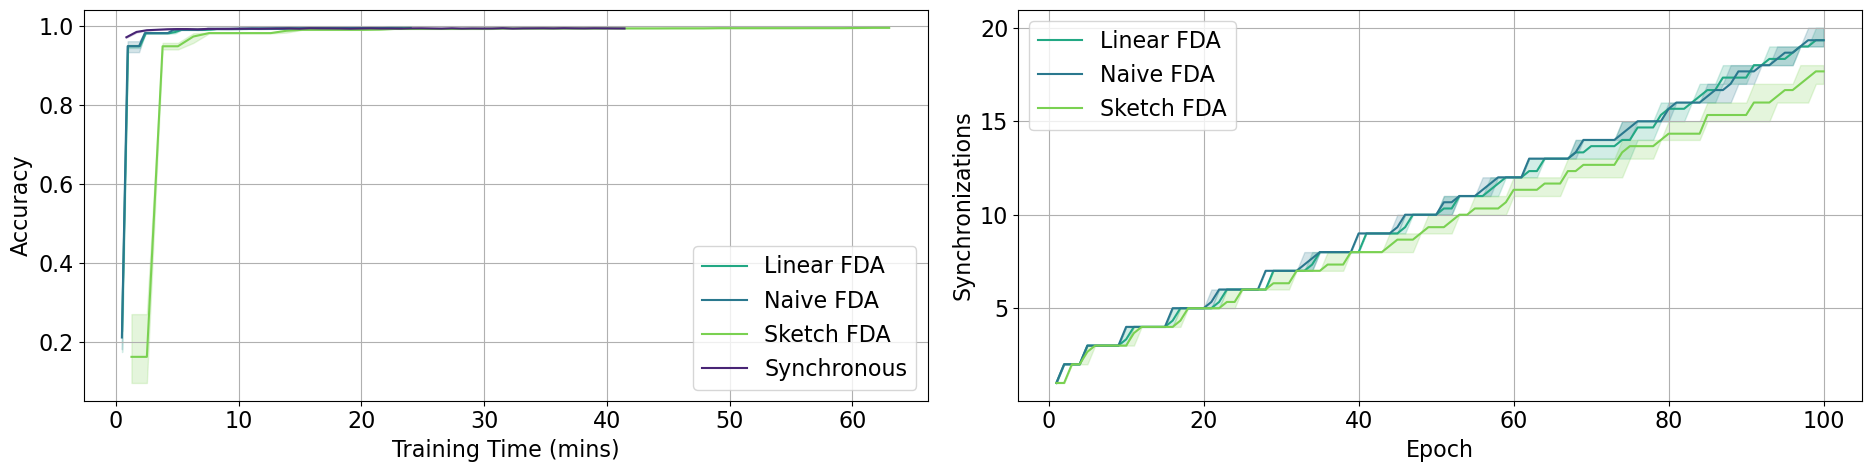

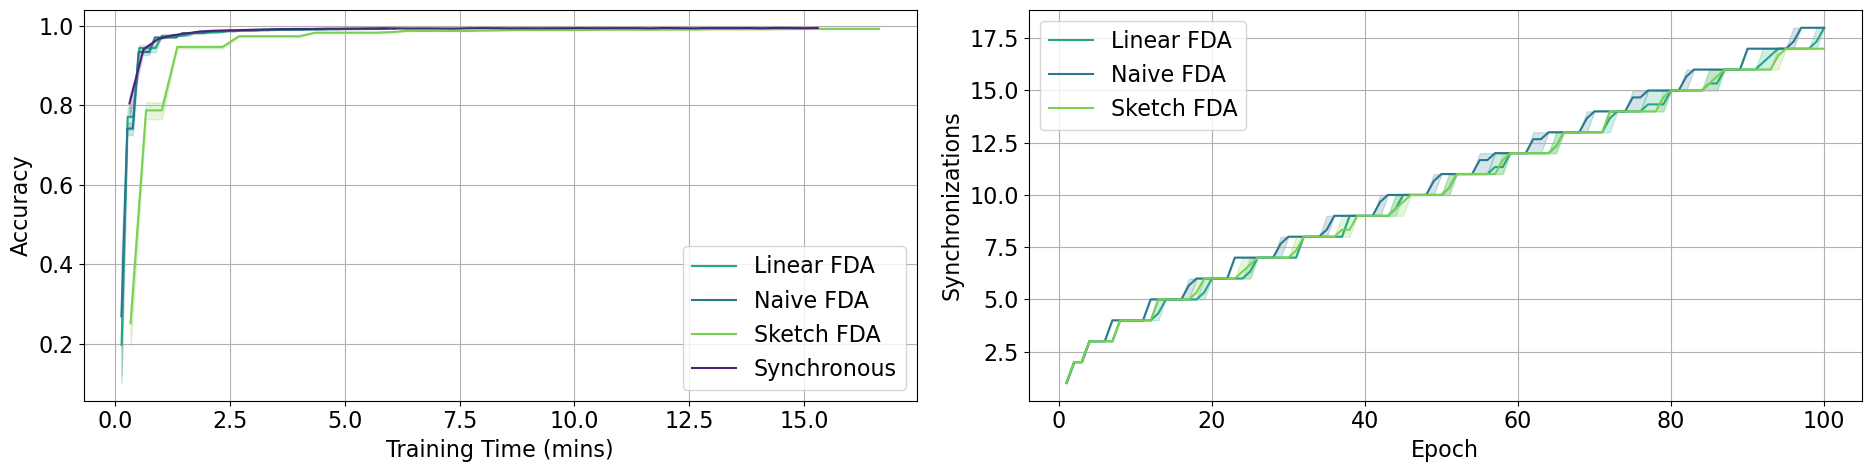

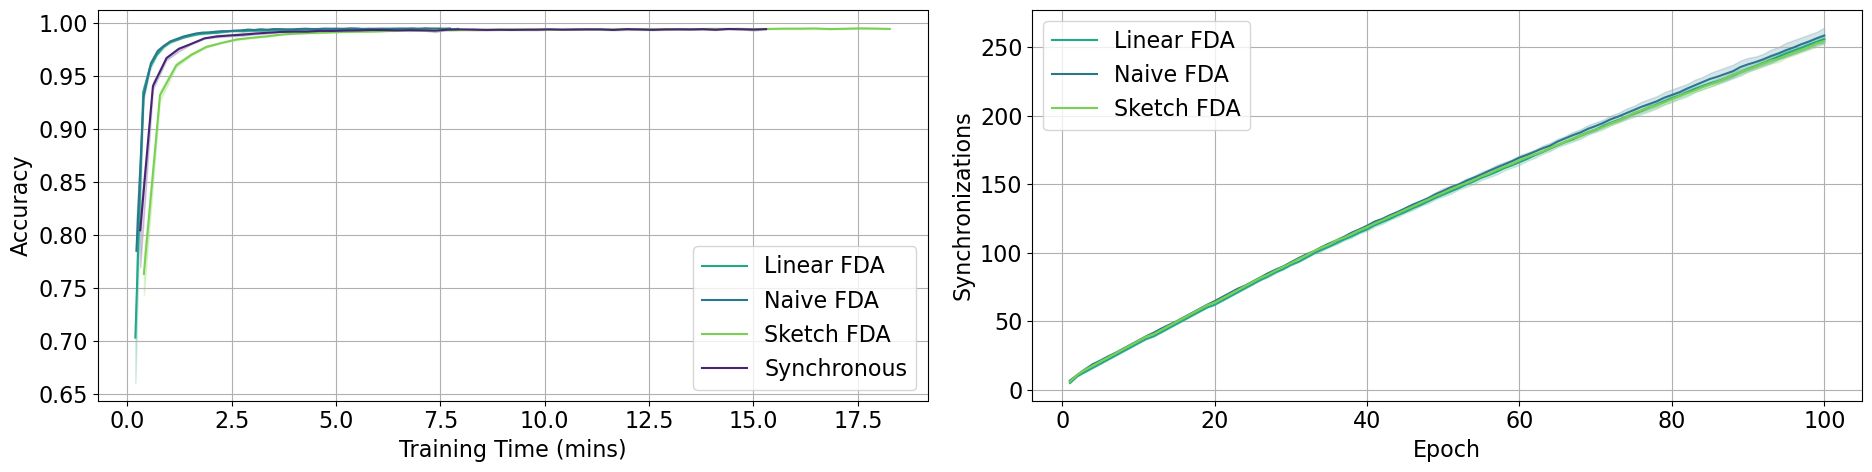

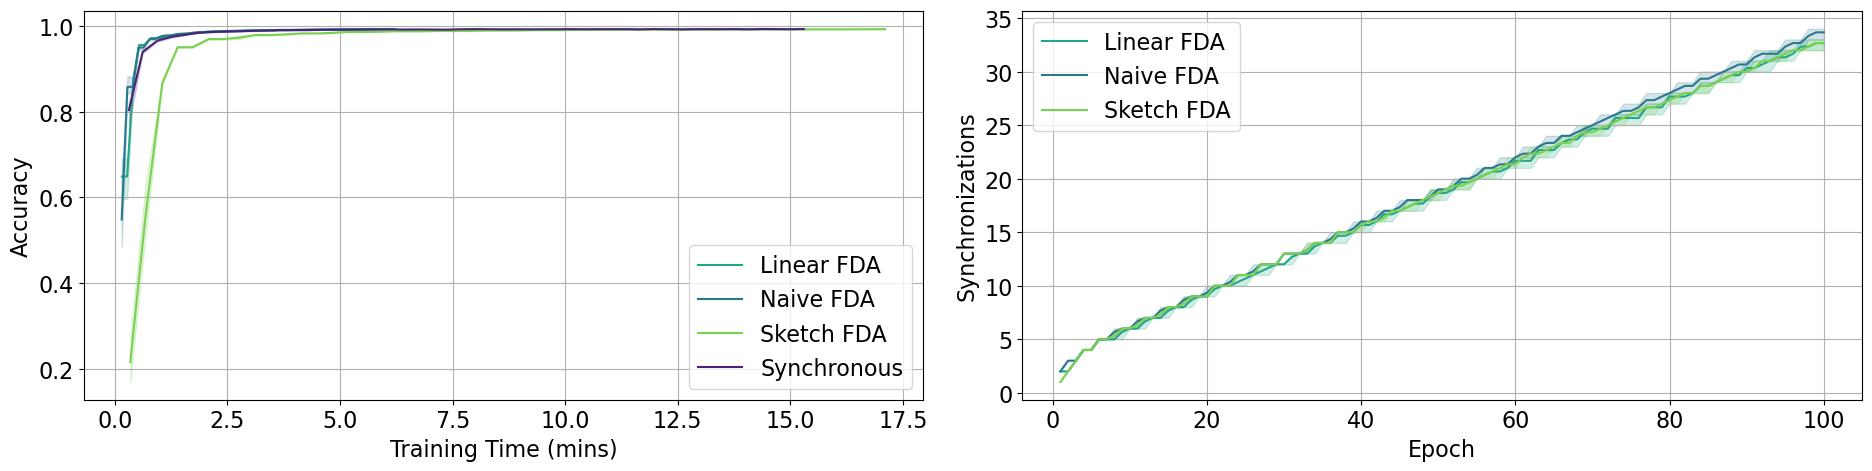

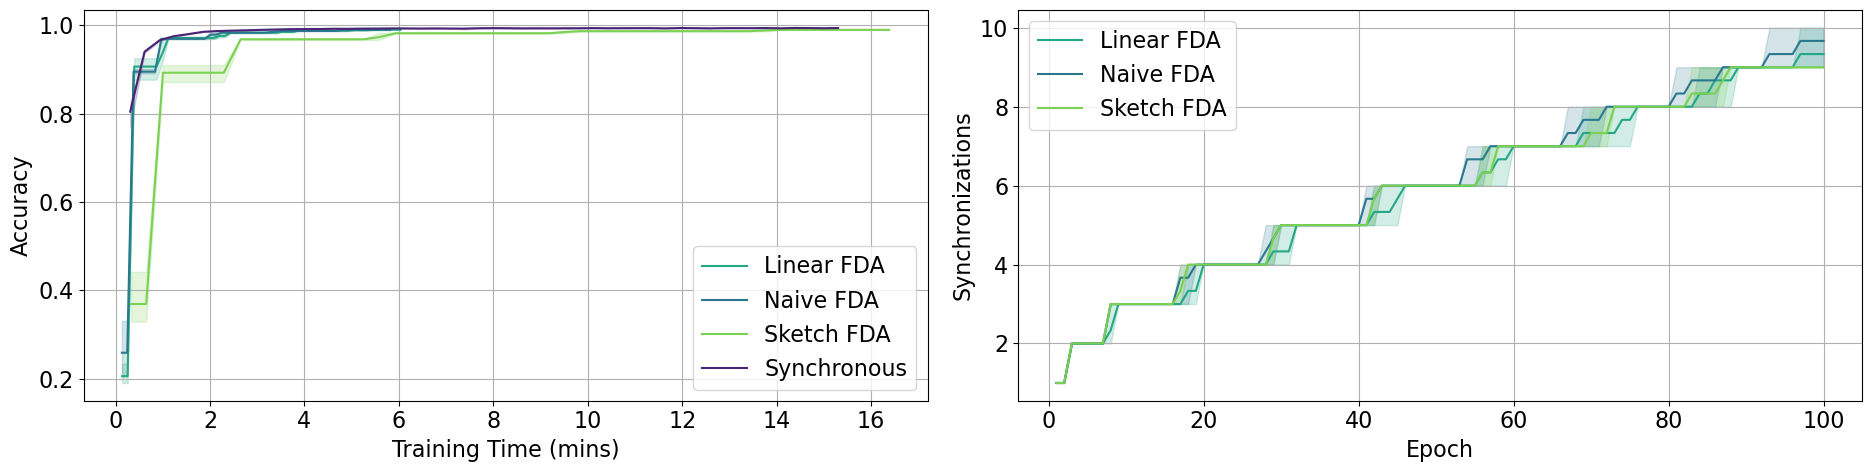

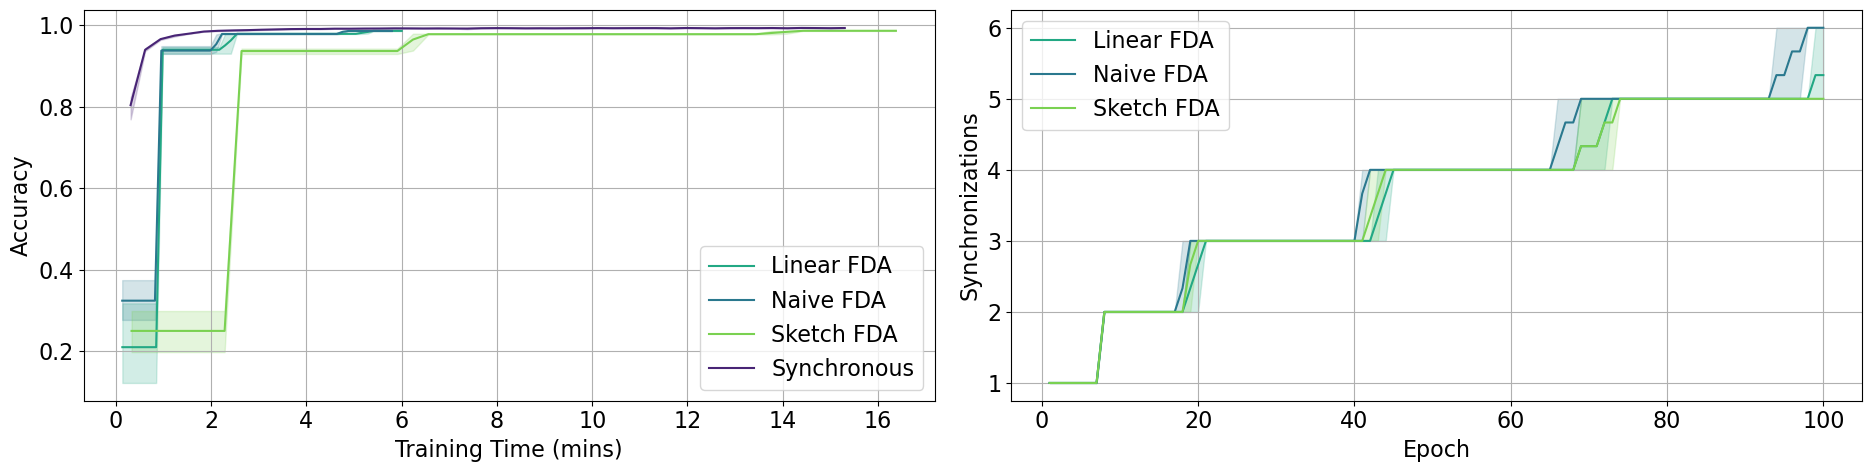

In [53]:
plt.rcParams.update({'font.size': 16})
for clients in (4, 8, 32):
    da = data_analysis("last_expers")
    da.select_where({'clients': clients, 'batch_size': 128})
    accuracy_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
    syncs_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'syncs_y', True)
    accuracy_df = accuracy_df[accuracy_df['epoch']<51]
    distinct_threshold = da.df['info'].dropna()['threshold'].unique()

    # For each individual number of threshold
    for threshold in distinct_threshold:
        # Filter the DataFrame for rows where 'threshold' column is equal to the current 'threshold'
        filtered_accuracy_df = accuracy_df[(accuracy_df['threshold'] == threshold) | (accuracy_df['threshold'].isna())]
        filtered_syncs_df = syncs_df[(syncs_df['threshold'] == threshold) & (syncs_df['algorithm'] != 'synchronous')]

        # Create a new figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

        # Plot for filtered_accuracy_df
        for key, group in filtered_accuracy_df.groupby('algorithm'):
            ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
            ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

        # Add title, labels, and legend for the first subplot
        ax1.set_xlabel("Training Time (mins)")
        ax1.set_ylabel("Accuracy")
        ax1.legend()

        # Plot for filtered_syncs_df
        for key, group in filtered_syncs_df.groupby('algorithm'):
            ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], color=algo_colors[key])
            ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])

        # Add title, labels, and legend for the second subplot
        ax2.set_xlabel("Epoch")
        ax2.set_ylabel("Synchronizations")
        ax2.legend()

        # Adjust layout to prevent overlap
        plt.tight_layout()
        
        # Show the plot
        ax1.grid()
        ax2.grid()

        plt.savefig("figures/accuracy_syncs-threshold_"+str(threshold)+"_clients_"+str(clients)+".pdf")

## Network Topologies

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.path_graph(32)  # An example graph
center_node = 0  # Or any other node to be in the center
edge_nodes = set(G) - {center_node}
# Ensures the nodes around the circle are evenly distributed
pos = nx.circular_layout(G.subgraph(edge_nodes))
pos[center_node] = np.array([0, 0])  # manually specify node position

for node in range(1, 31):
    G.remove_edge(node, (node + 1) % 32)

for node in range(1,32):
    G.add_edge(node, 0)

nx.draw(G, pos, with_labels=True)
plt.savefig("figures/star.pdf")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.path_graph(32)  # An example graph

# Ensures the nodes around the circle are evenly distributed
pos = nx.circular_layout(G)

# Connect node 31 to node 0
G.add_edge(31, 0)

nx.draw(G, pos, with_labels=True)
plt.savefig("figures/ring.pdf")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(
[
    ("0", "1"),
    ("0", "2"),
    ("1", "3"),
    ("1", "4"),
    ("2", "5"),
    ("2", "6"),
    ("3", "7"),
    ("3", "8"),
    ("4", "9"),
    ("4", "10"),
    ("5", "11"),
    ("5", "12"),
    ("6", "13"),
    ("6", "14"),
    ("7", "15"),
    ("7", "16"),
    ("8", "17"),
    ("8", "18"),
    ("9", "19"),
    ("9", "20"),
    ("10", "21"),
    ("10", "22"),
    ("11", "23"),
    ("11", "24"),
    ("12", "25"),
    ("12", "26"),
    ("13", "27"),
    ("13", "28"),
    ("14", "29"),
    ("14", "30"),
    ("15", "31")
]

)

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

# Manually set the y-coordinate of node 31 to be the same as node 15
pos["31"][1] = pos["15"][1]
pos["31"][0] = pos["31"][0] - 0.08

nx.draw(G, pos=pos, with_labels=True, arrows=False)
plt.savefig("figures/binary_tree.pdf")

## Topology Communication Time Distribution

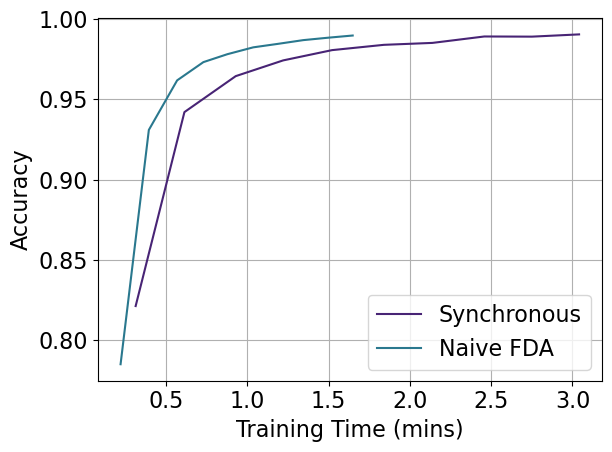

In [59]:
da = data_analysis("latest_expers")
da.select_where({'topology': 'ring'})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
distinct_clients = da.df['info']['clients'].unique()

da = data_analysis("last_expers")
da.select_where({'algorithm':'naive', 'batch_size':128, 'clients':32, 'threshold':1})
accuracy_df_2 = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df_2 = accuracy_df_2[accuracy_df_2['epoch']<11]

# Plot for filtered_accuracy_df
for key, group in accuracy_df.groupby('algorithm'):
    plt.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])

for key, group in accuracy_df_2.groupby('algorithm'):
    plt.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])

# Add title, labels, and legend for the first subplot
plt.xlabel("Training Time (mins)")
plt.ylabel("Accuracy")
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.grid()

plt.savefig("figures/accuracy-ring.pdf")

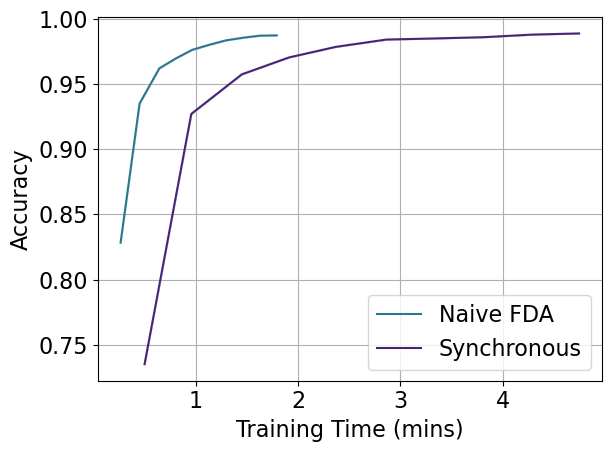

In [60]:
da = data_analysis("latest_expers")
da.select_where({'topology': 'binary_tree'})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
distinct_clients = da.df['info']['clients'].unique()

# For each individual number of clients
for clients in distinct_clients:
    # Filter the DataFrame for rows where 'clients' column is equal to the current 'clients'
    filtered_accuracy_df = accuracy_df[accuracy_df['clients'] == clients]

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        plt.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
        plt.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    plt.xlabel("Training Time (mins)")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.grid()

    plt.savefig("figures/accuracy-binary_tree.pdf")

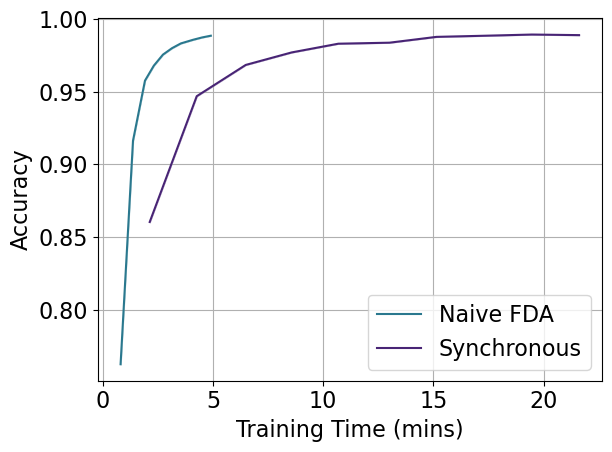

In [61]:
da = data_analysis("latest_expers")
da.select_where({'topology': 'star'})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
distinct_clients = da.df['info']['clients'].unique()

# For each individual number of clients
for clients in distinct_clients:
    # Filter the DataFrame for rows where 'clients' column is equal to the current 'clients'
    filtered_accuracy_df = accuracy_df[accuracy_df['clients'] == clients]

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        plt.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], color=algo_colors[key])
        plt.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    plt.xlabel("Training Time (mins)")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.grid()

    plt.savefig("figures/accuracy-star.pdf")

Index([0, 143, 286], dtype='int64')


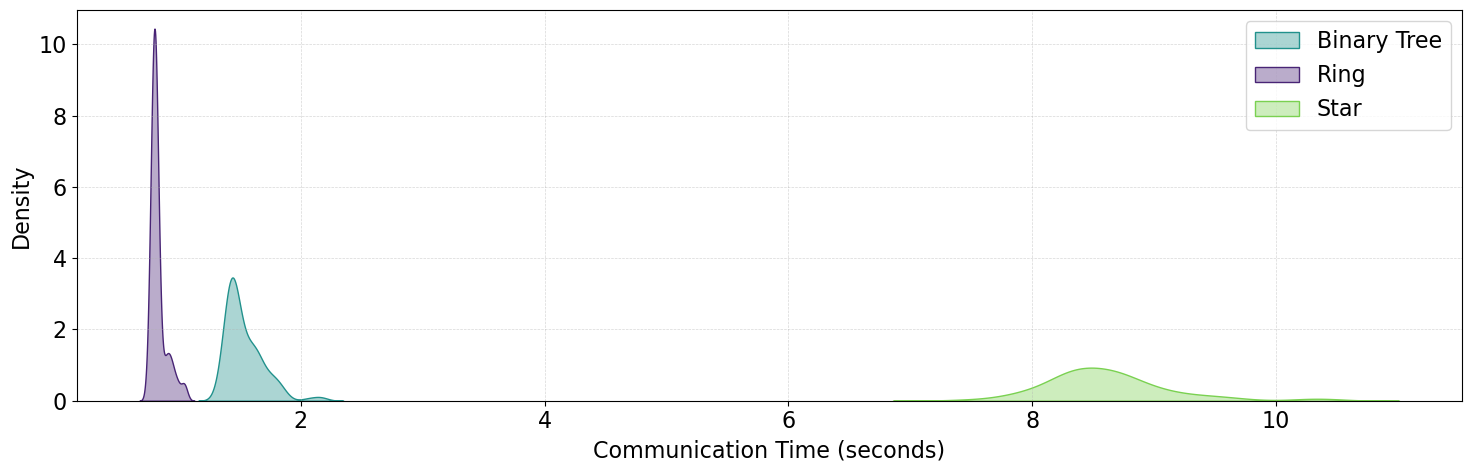

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_analysis' is properly defined and has necessary methods

da = data_analysis("latest_expers")
da.select_where({'algorithm': 'synchronous'})
da.df['step']['diff_com_time'] = da.df['step']['com_time'].diff()
index_to_drop = da.df['step'][da.df['step']['step'] == 1].index
print(index_to_drop)
da.df['step'].drop(index_to_drop, inplace=True)

plt.figure(figsize=(15, 5))  # Adjust figure size based on your preferences

for key, group in da.df['step'].groupby('topology'):
    sns.kdeplot(group['diff_com_time'], fill=True, label=topology_labels[key], color=topology_colors[key], alpha=0.375)

plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.xlabel('Communication Time (seconds)')
plt.tight_layout()
plt.legend()
plt.savefig("figures/com_time_distr.pdf")


In [ ]:
sns.kdeplot(group['diff_com_time'], ax=ax, fill=True, label=algorithm, color=color, alpha=0.375)
ax.grid(True, linestyle="--",linewidth=0.5,alpha=0.5)
if nodes == '1': ax.set_title(f'Distribution of Aggregation Time for {nodes} node')
else: ax.set_title(f'Distribution of Aggregation Time for {nodes} nodes')
ax.set_xlabel('Aggregation Time (seconds)')
ax.set_ylabel('Density')
ax.legend()